In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cricket/Cricket.csv


In [3]:
df = pd.read_csv(r"/kaggle/input/cricket/Cricket.csv",encoding='latin1')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


### Duplicate Check

In [4]:
df.shape

(79, 13)

In [5]:
df_dub = df.copy()
# Checking for duplicates and dropping the entire duplicate row if any
df_dub.drop_duplicates(subset=None, inplace=True)

In [6]:
df_dub.shape

(79, 13)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Data Inspection

In [7]:
df.shape

(79, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [9]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


# Data Cleaning

Null Percentage: Columns

In [10]:
(df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

0.0    13
dtype: int64

Null Count: Columns

In [11]:
df.isnull().sum().value_counts(ascending=False)

0    13
dtype: int64

Null Percentage: Rows

In [12]:
(df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

0.0    79
dtype: int64

Null Count: Rows

In [13]:
df.isnull().sum(axis=1).value_counts(ascending=False)

0    79
dtype: int64

There are no missing / Null values either in columns or rows

# Exploratory Data Analytics

## Data Preparation

Derived Metrices

In [14]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [15]:
df[['Strt','End']] = df.Span.str.split("-",expand=True) 

In [16]:
df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1) 
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


## Univariate Analysis

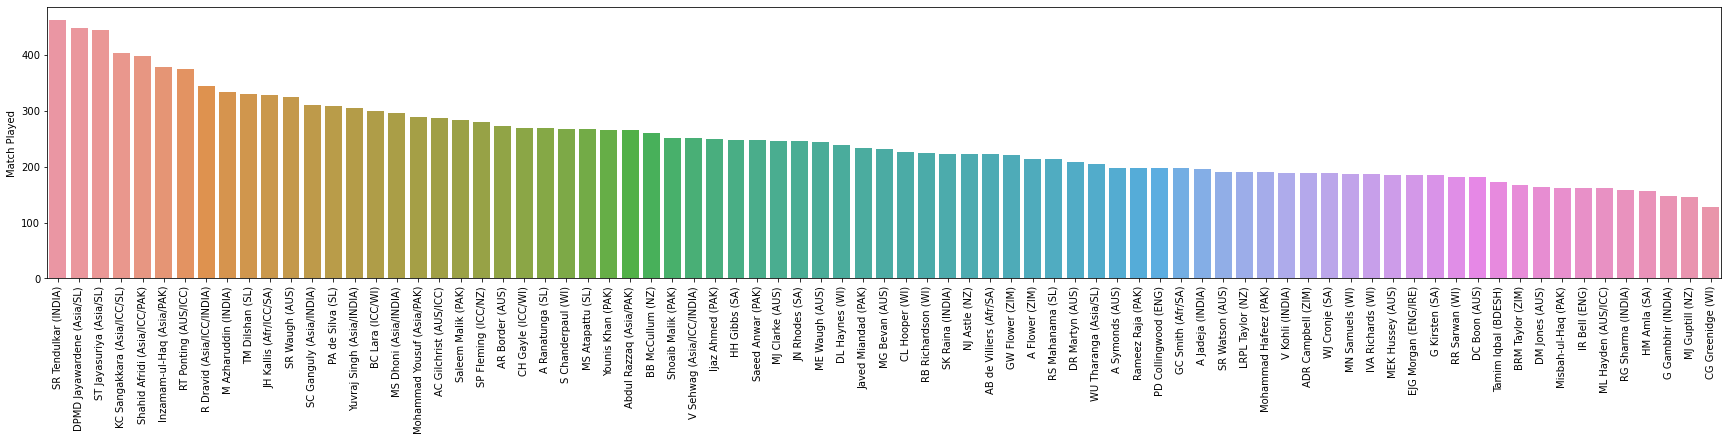

In [17]:
#Match Played
plt.figure(figsize = (30,5))
mat = df[['Player','Mat']].sort_values('Mat', ascending = False)
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

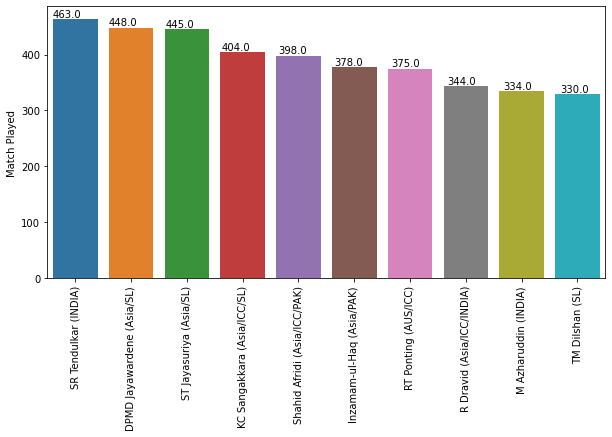

In [18]:
plt.figure(figsize = (10,5))
mat_top10 = df[['Player','Mat']].sort_values('Mat', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Mat', data= mat_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

All are Batsmans

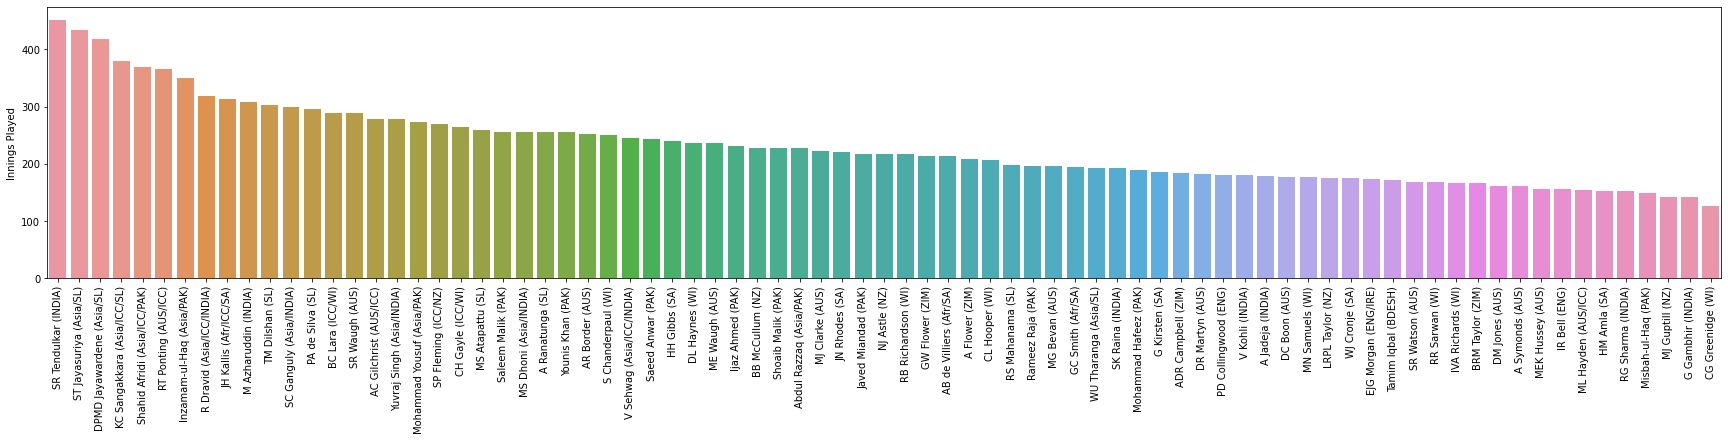

In [19]:
#Inns
plt.figure(figsize = (30,5))
inns = df[['Player','Inns']].sort_values('Inns', ascending = False)
ax = sns.barplot(x='Player', y='Inns', data= inns)
ax.set(xlabel = '', ylabel= 'Innings Played')
plt.xticks(rotation=90)
plt.show()

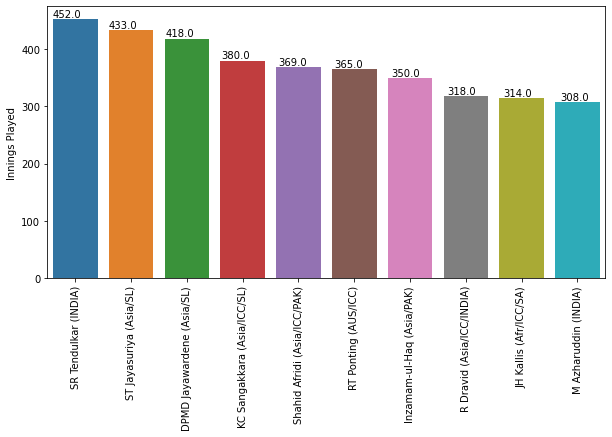

In [20]:
plt.figure(figsize = (10,5))
inns_top10 = df[['Player','Inns']].sort_values('Inns', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Inns', data= inns_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Innings Played')
plt.xticks(rotation=90)
plt.show()

All are Batsmans

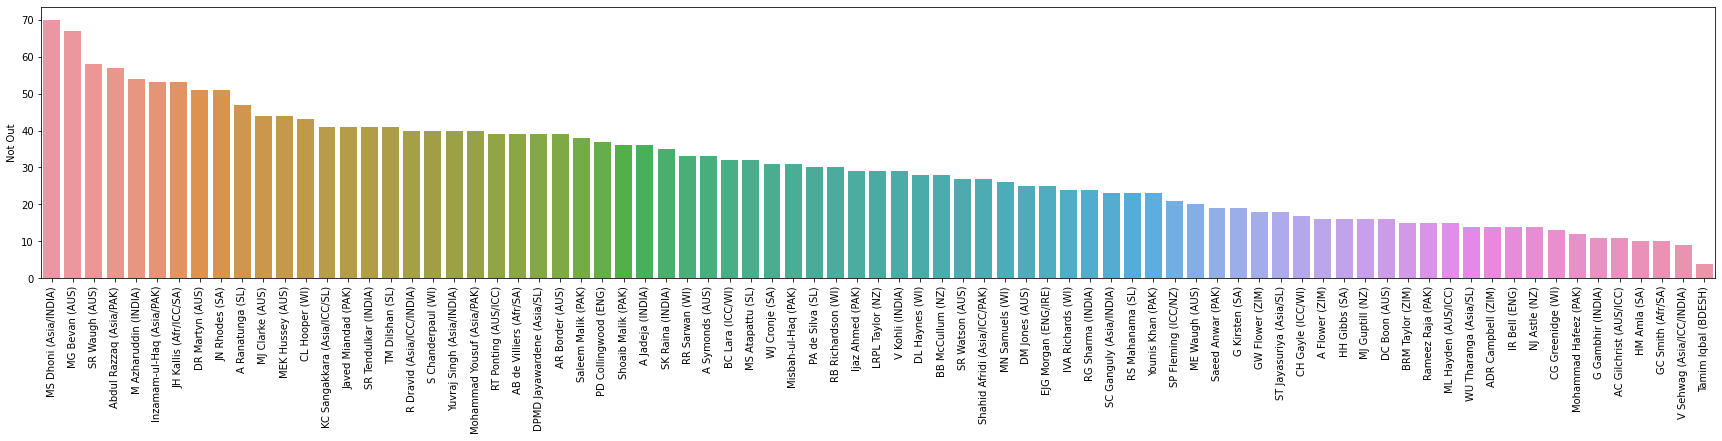

In [21]:
#NO
plt.figure(figsize = (30,5))
no = df[['Player','NO']].sort_values('NO', ascending = False)
ax = sns.barplot(x='Player', y='NO', data= no)
ax.set(xlabel = '', ylabel= 'Not Out')
plt.xticks(rotation=90)
plt.show()

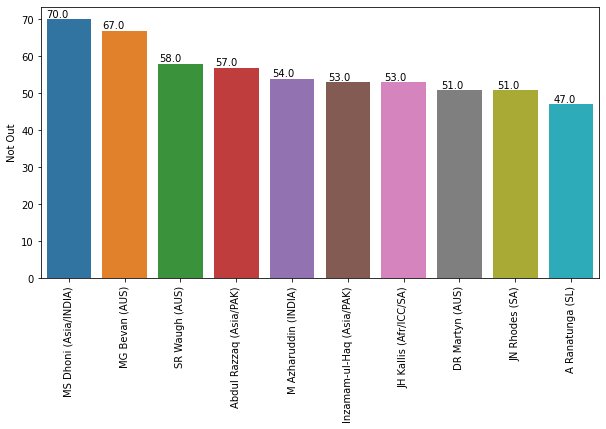

In [22]:
plt.figure(figsize = (10,5))
inns_top10 = df[['Player','NO']].sort_values('NO', ascending = False).head(10)
ax = sns.barplot(x='Player', y='NO', data= inns_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Not Out')
plt.xticks(rotation=90)
plt.show()

All are batsman

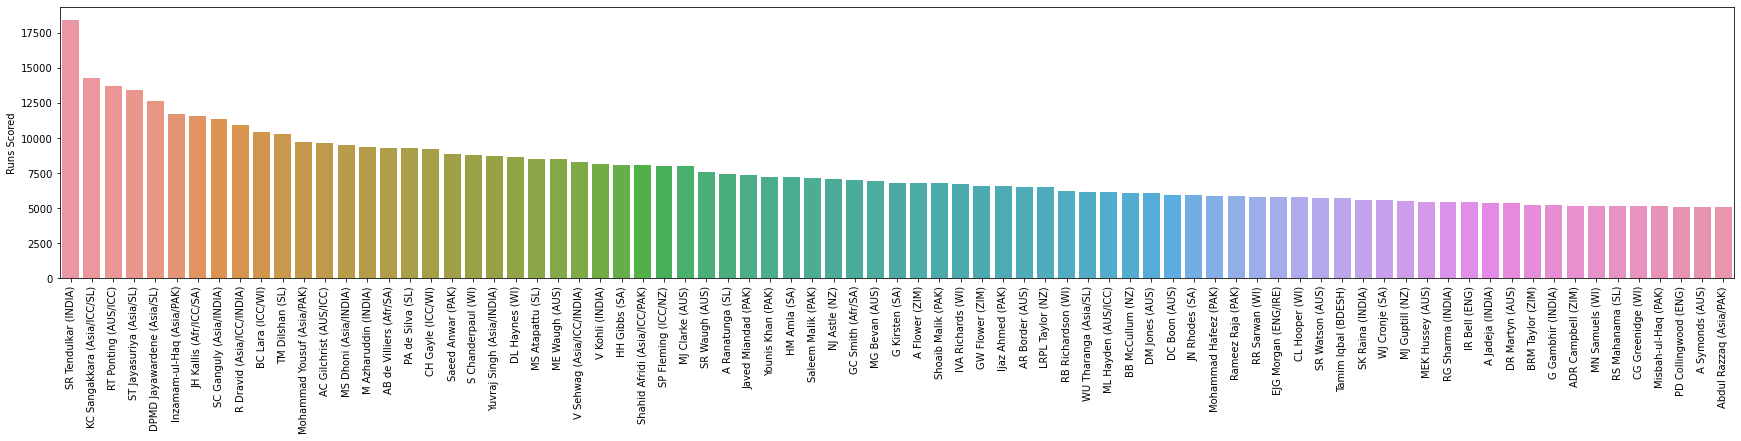

In [23]:
#Runs
plt.figure(figsize = (30,5))
run = df[['Player','Runs']].sort_values('Runs', ascending = False)
ax = sns.barplot(x='Player', y='Runs', data= run)
ax.set(xlabel = '', ylabel= 'Runs Scored')
plt.xticks(rotation=90)
plt.show()

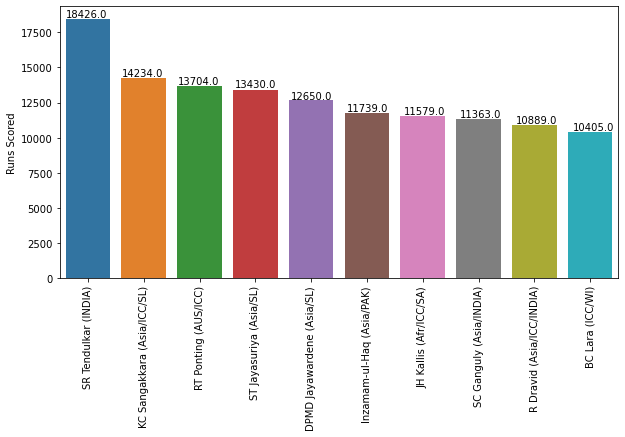

In [24]:
plt.figure(figsize = (10,5))
runs_top10 = df[['Player','Runs']].sort_values('Runs', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Runs', data= runs_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Runs Scored')
plt.xticks(rotation=90)
plt.show()

All are batsmans

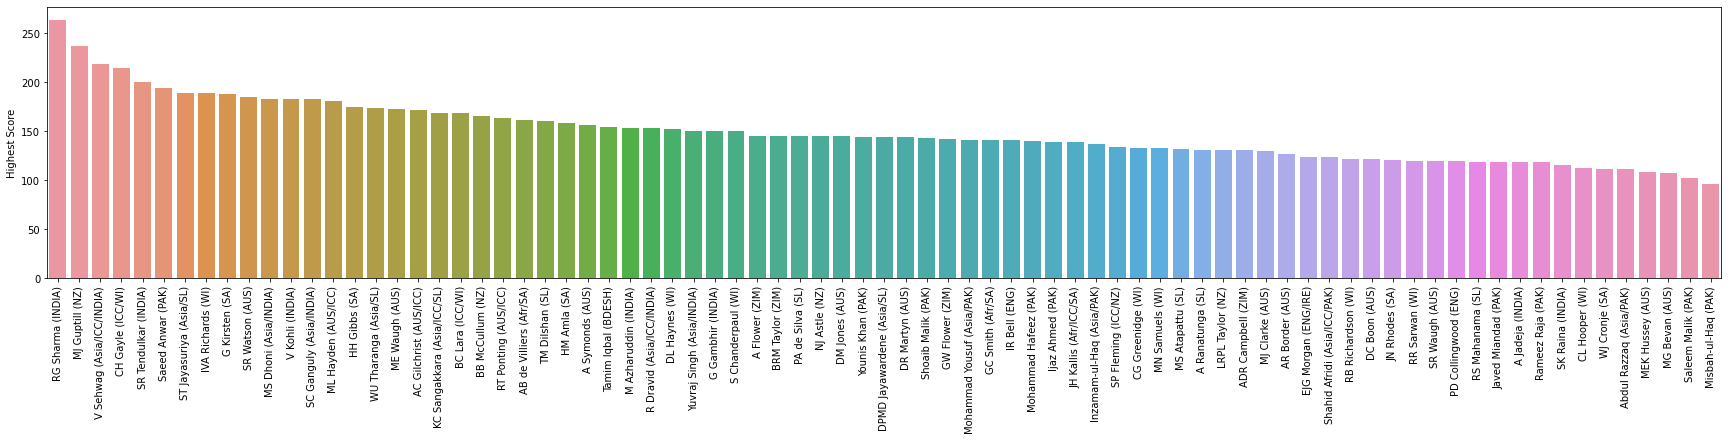

In [25]:
#HS
df.HS=df.HS.str.extract('(\d+)')
df.HS=df.HS.astype(int)
plt.figure(figsize = (30,5))
hs = df[['Player','HS']].sort_values('HS', ascending = False)
ax = sns.barplot(x='Player', y='HS', data= hs)
ax.set(xlabel = '', ylabel= 'Highest Score')
plt.xticks(rotation=90)
plt.show()

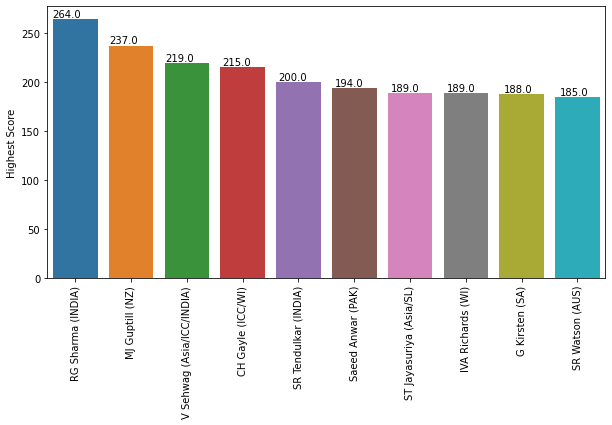

In [26]:
plt.figure(figsize = (10,5))
hs_top10 = df[['Player','HS']].sort_values('HS', ascending = False).head(10)
ax = sns.barplot(x='Player', y='HS', data= hs_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Highest Score')
plt.xticks(rotation=90)
plt.show()

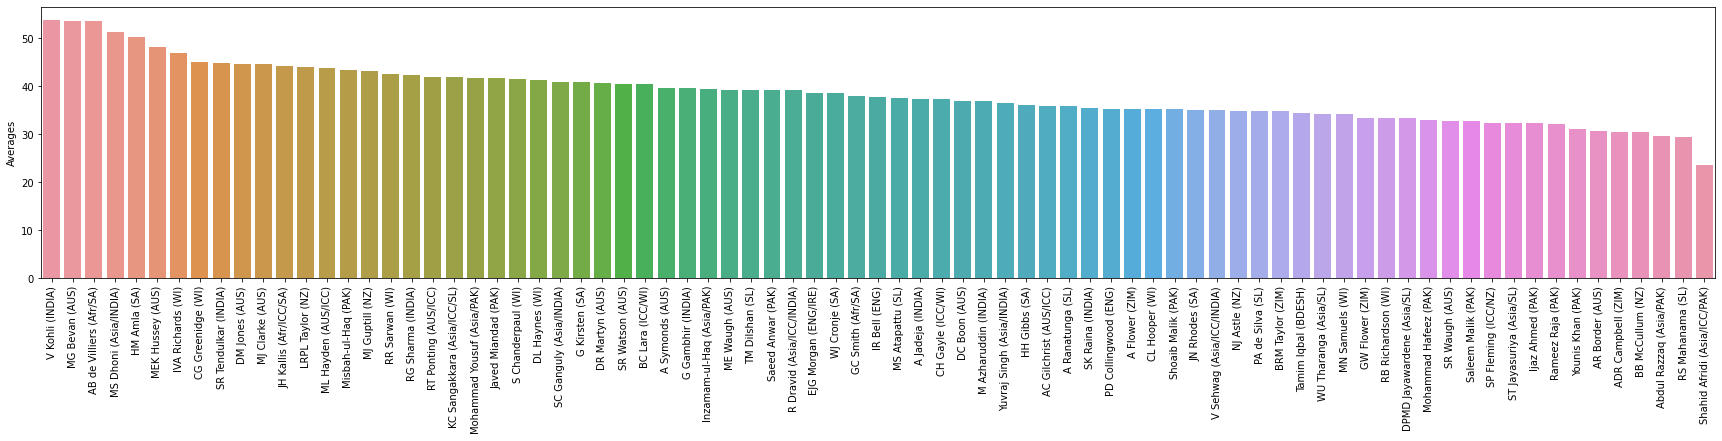

In [27]:
#Ave
plt.figure(figsize = (30,5))
ave = df[['Player','Ave']].sort_values('Ave', ascending = False)
ax = sns.barplot(x='Player', y='Ave', data= ave)
ax.set(xlabel = '', ylabel= 'Averages')
plt.xticks(rotation=90)
plt.show()

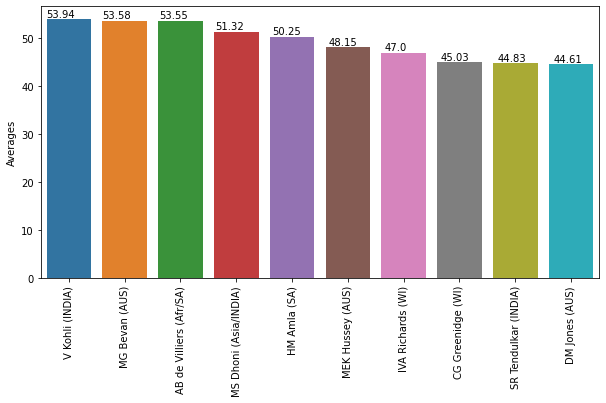

In [28]:
plt.figure(figsize = (10,5))
avg_top10 = df[['Player','Ave']].sort_values('Ave', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Ave', data= avg_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Averages')
plt.xticks(rotation=90)
plt.show()

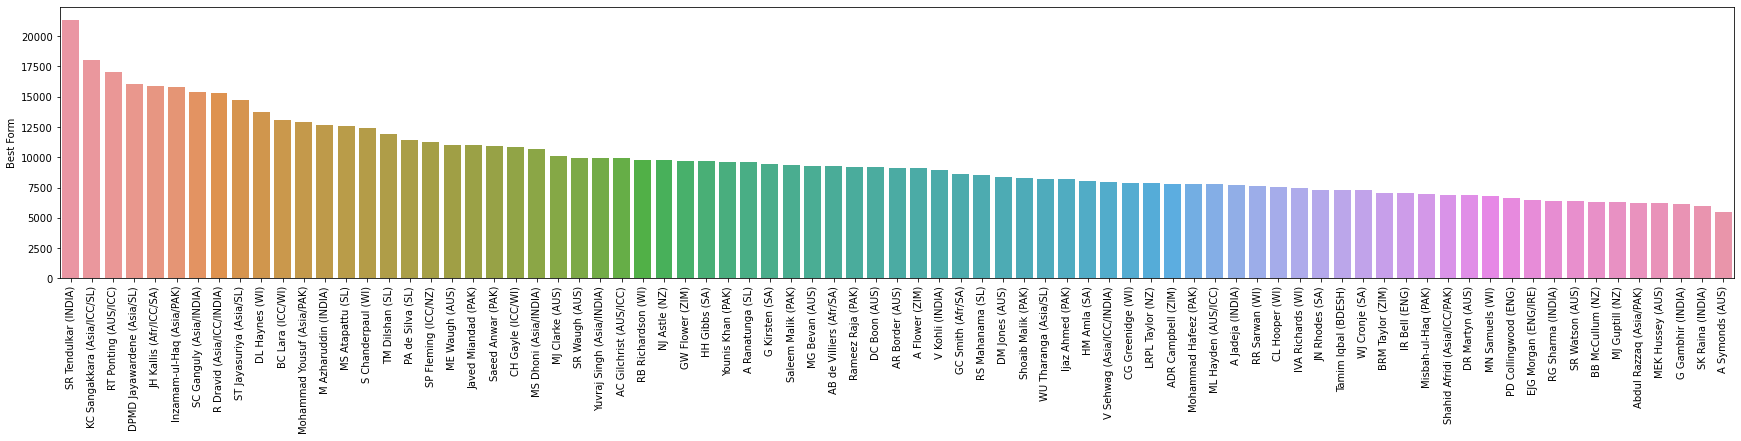

In [29]:
#BF
plt.figure(figsize = (30,5))
bf = df[['Player','BF']].sort_values('BF', ascending = False)
ax = sns.barplot(x='Player', y='BF', data= bf)
ax.set(xlabel = '', ylabel= 'Best Form')
plt.xticks(rotation=90)
plt.show()

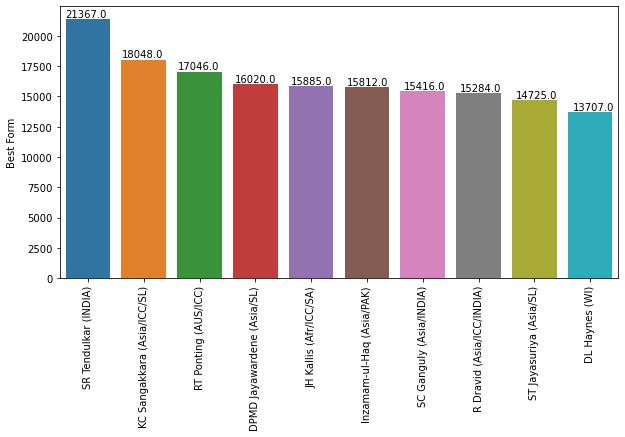

In [30]:
plt.figure(figsize = (10,5))
bf_top10 = df[['Player','BF']].sort_values('BF', ascending = False).head(10)
ax = sns.barplot(x='Player', y='BF', data= bf_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Best Form')
plt.xticks(rotation=90)
plt.show()

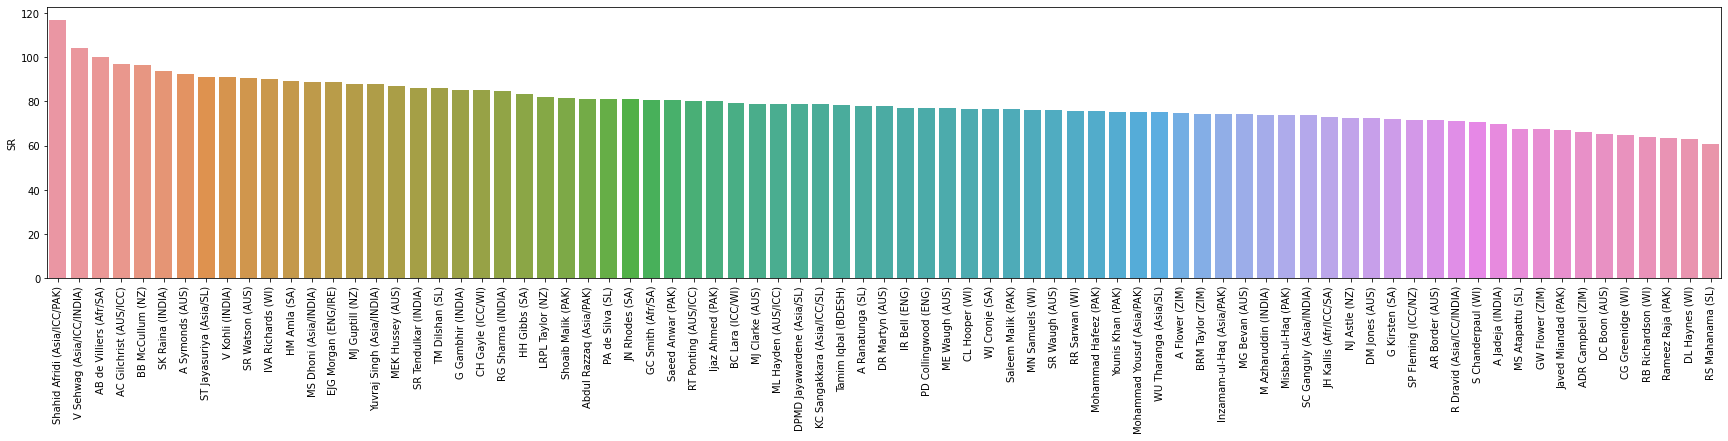

In [31]:
#SR 
plt.figure(figsize = (30,5))
sr = df[['Player','SR']].sort_values('SR', ascending = False)
ax = sns.barplot(x='Player', y='SR', data= sr)
ax.set(xlabel = '', ylabel= 'SR')
plt.xticks(rotation=90)
plt.show()

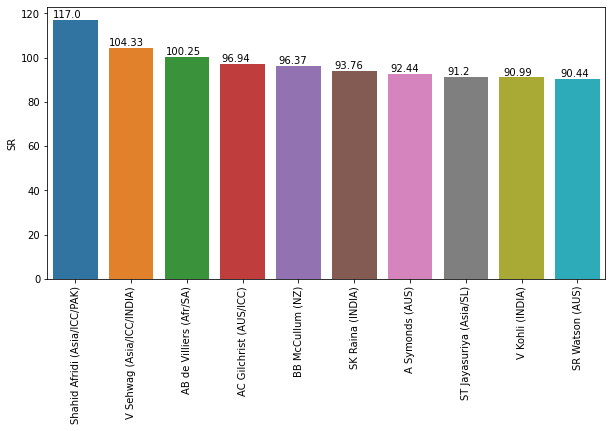

In [32]:
plt.figure(figsize = (10,5))
sr_top10 = df[['Player','SR']].sort_values('SR', ascending = False).head(10)
ax = sns.barplot(x='Player', y='SR', data= sr_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'SR')
plt.xticks(rotation=90)
plt.show()

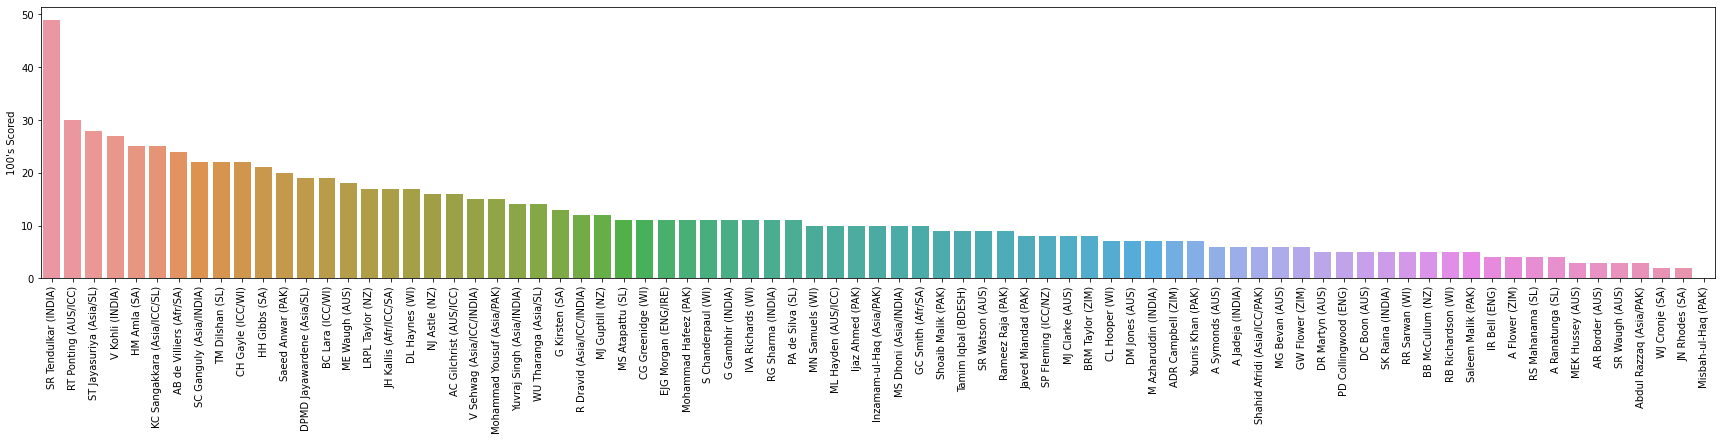

In [33]:
#100
plt.figure(figsize = (30,5))
r100 = df[['Player','100']].sort_values('100', ascending = False)
ax = sns.barplot(x='Player', y='100', data= r100)
ax.set(xlabel = '', ylabel= "100's Scored" )
plt.xticks(rotation=90)
plt.show()

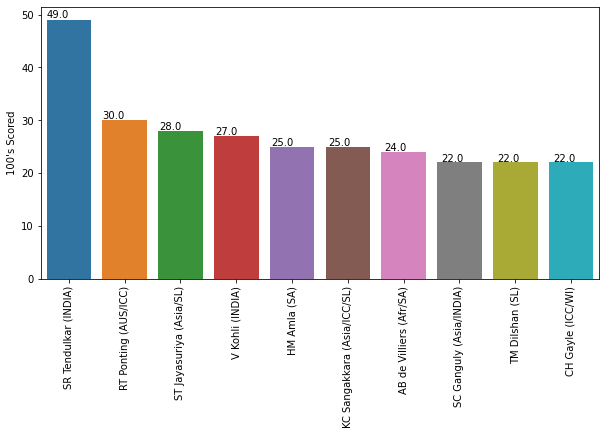

In [34]:
plt.figure(figsize = (10,5))
r100_top10 = df[['Player','100']].sort_values('100', ascending = False).head(10)
ax = sns.barplot(x='Player', y='100', data= r100_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= "100's Scored")
plt.xticks(rotation=90)
plt.show()

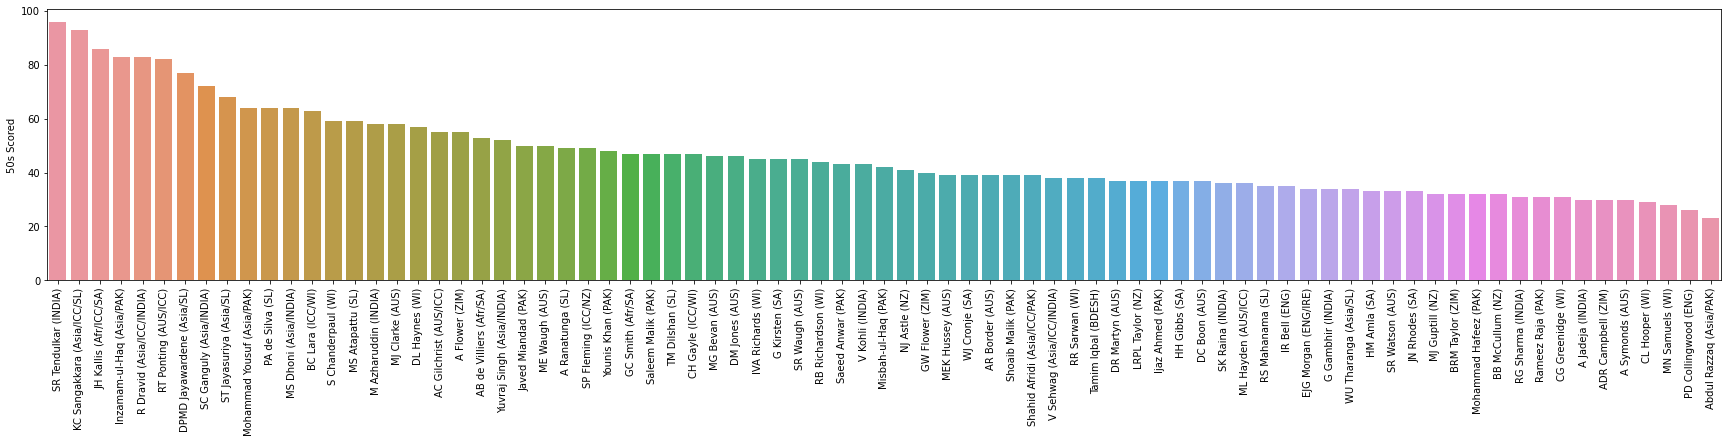

In [35]:
#50
plt.figure(figsize = (30,5))
r50 = df[['Player','50']].sort_values('50', ascending = False)
ax = sns.barplot(x='Player', y='50', data= r50)
ax.set(xlabel = '', ylabel= "50s Scored")
plt.xticks(rotation=90)
plt.show()

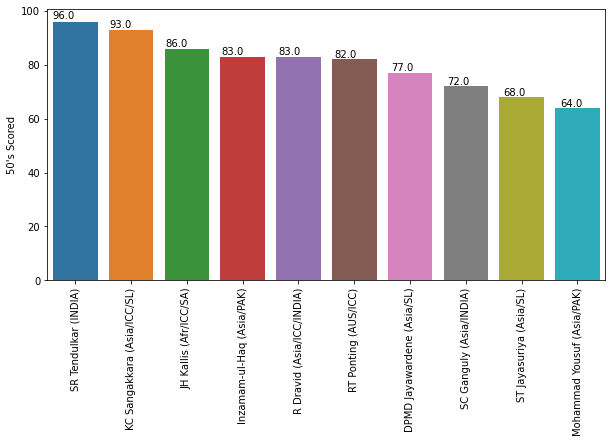

In [36]:
plt.figure(figsize = (10,5))
r50_top10 = df[['Player','50']].sort_values('50', ascending = False).head(10)
ax = sns.barplot(x='Player', y='50', data= r50_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= "50's Scored")
plt.xticks(rotation=90)
plt.show()

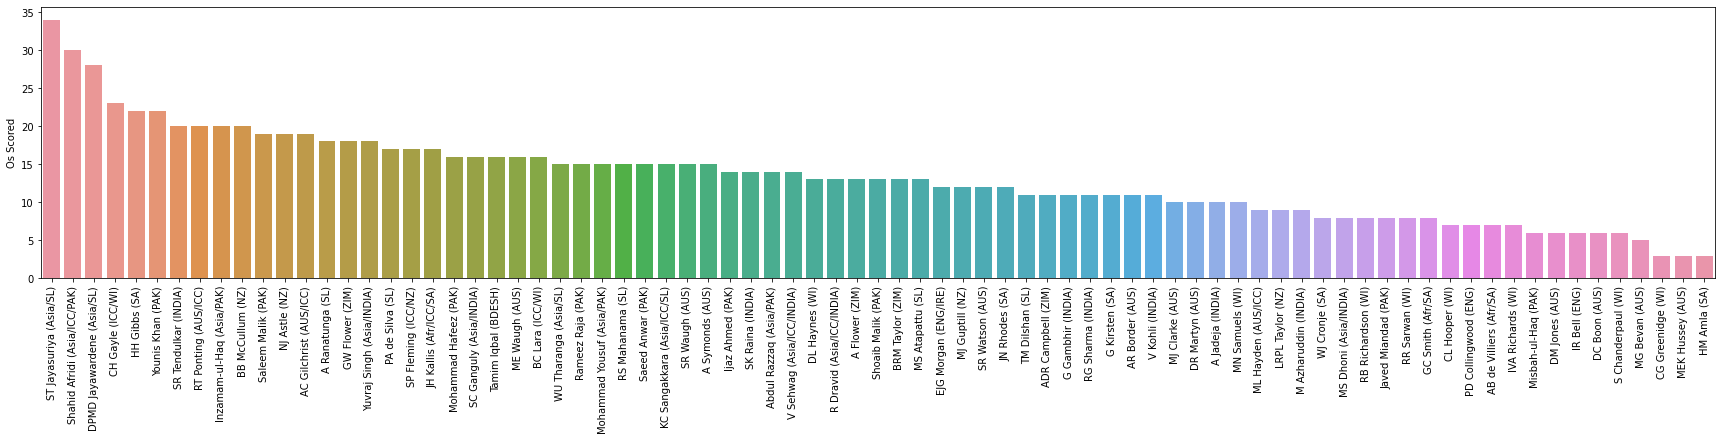

In [37]:
#0
plt.figure(figsize = (30,5))
r0 = df[['Player','0']].sort_values('0', ascending = False)
ax = sns.barplot(x='Player', y='0', data= r0)
ax.set(xlabel = '', ylabel= "Os Scored")
plt.xticks(rotation=90)
plt.show()

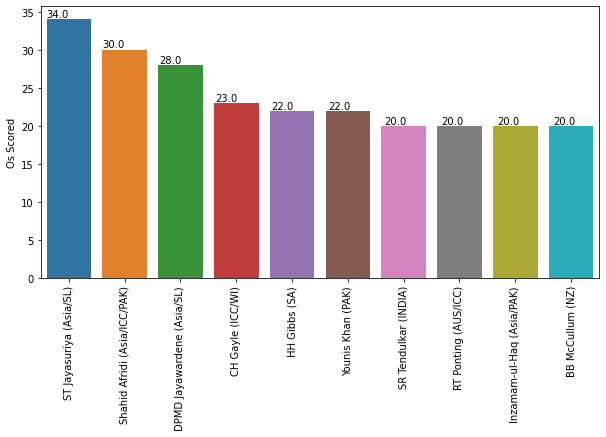

In [38]:
plt.figure(figsize = (10,5))
r0_top10 = df[['Player','0']].sort_values('0', ascending = False).head(10)
ax = sns.barplot(x='Player', y='0', data= r0_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= "Os Scored")
plt.xticks(rotation=90)
plt.show()

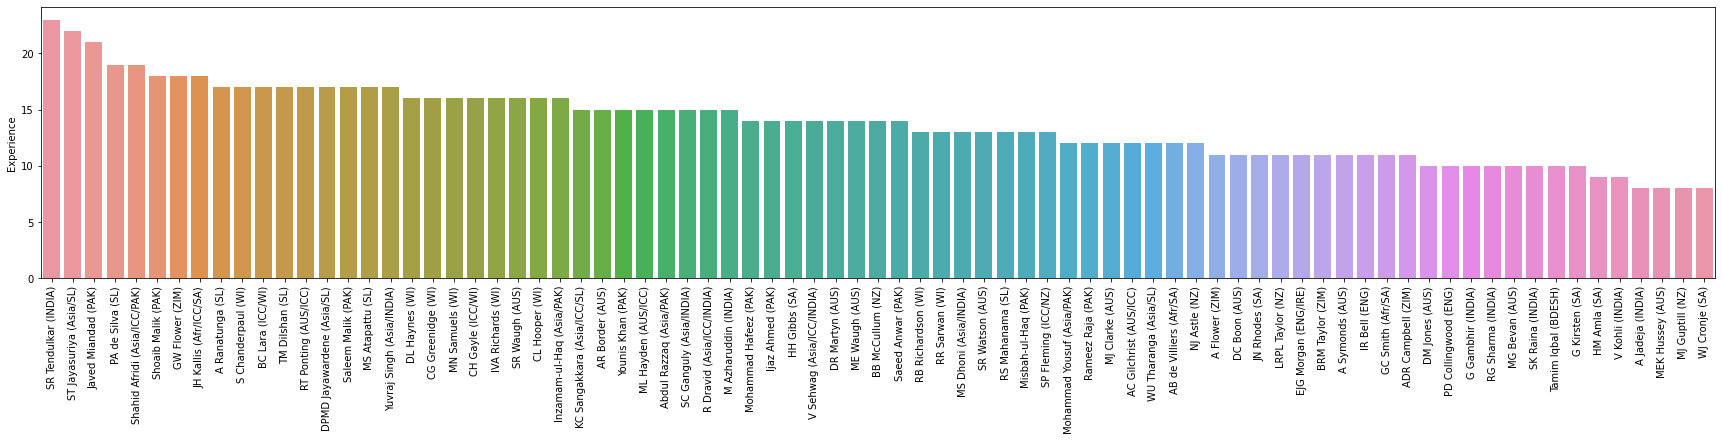

In [39]:
#Exp
plt.figure(figsize = (30,5))
exp = df[['Player','Exp']].sort_values('Exp', ascending = False)
ax = sns.barplot(x='Player', y='Exp', data= exp)
ax.set(xlabel = '', ylabel= 'Experience')
plt.xticks(rotation=90)
plt.show()

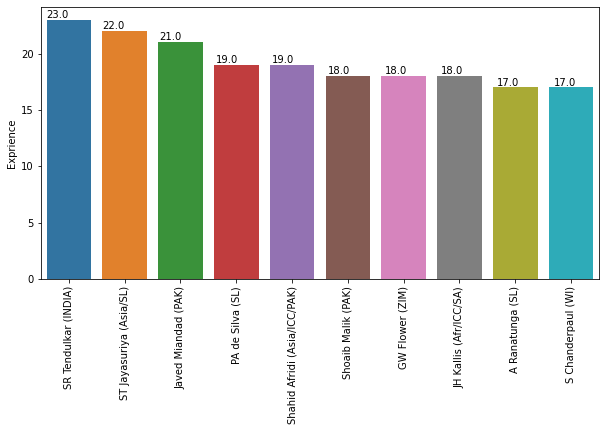

In [40]:
plt.figure(figsize = (10,5))
exp_top10 = df[['Player','Exp']].sort_values('Exp', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Exp', data= exp_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exprience')
plt.xticks(rotation=90)
plt.show()

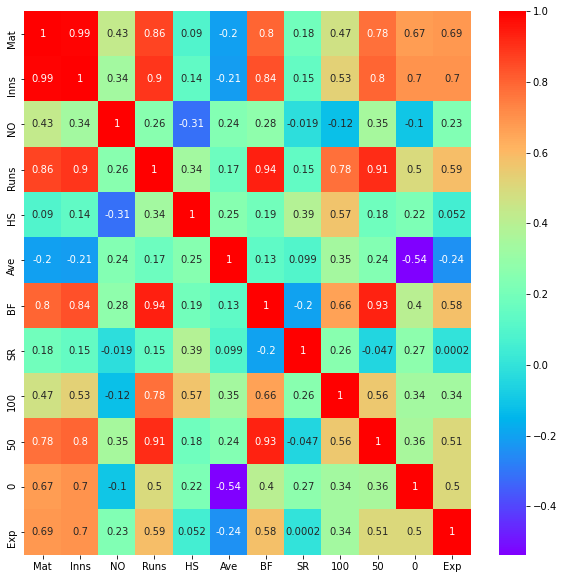

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

- Mat and Inns are highly correlated with correlation of 0.99
- Mat and Runs are highly correlated with correlation of 0.86
- Runs and Inns are highly correlated with correlation of 0.90

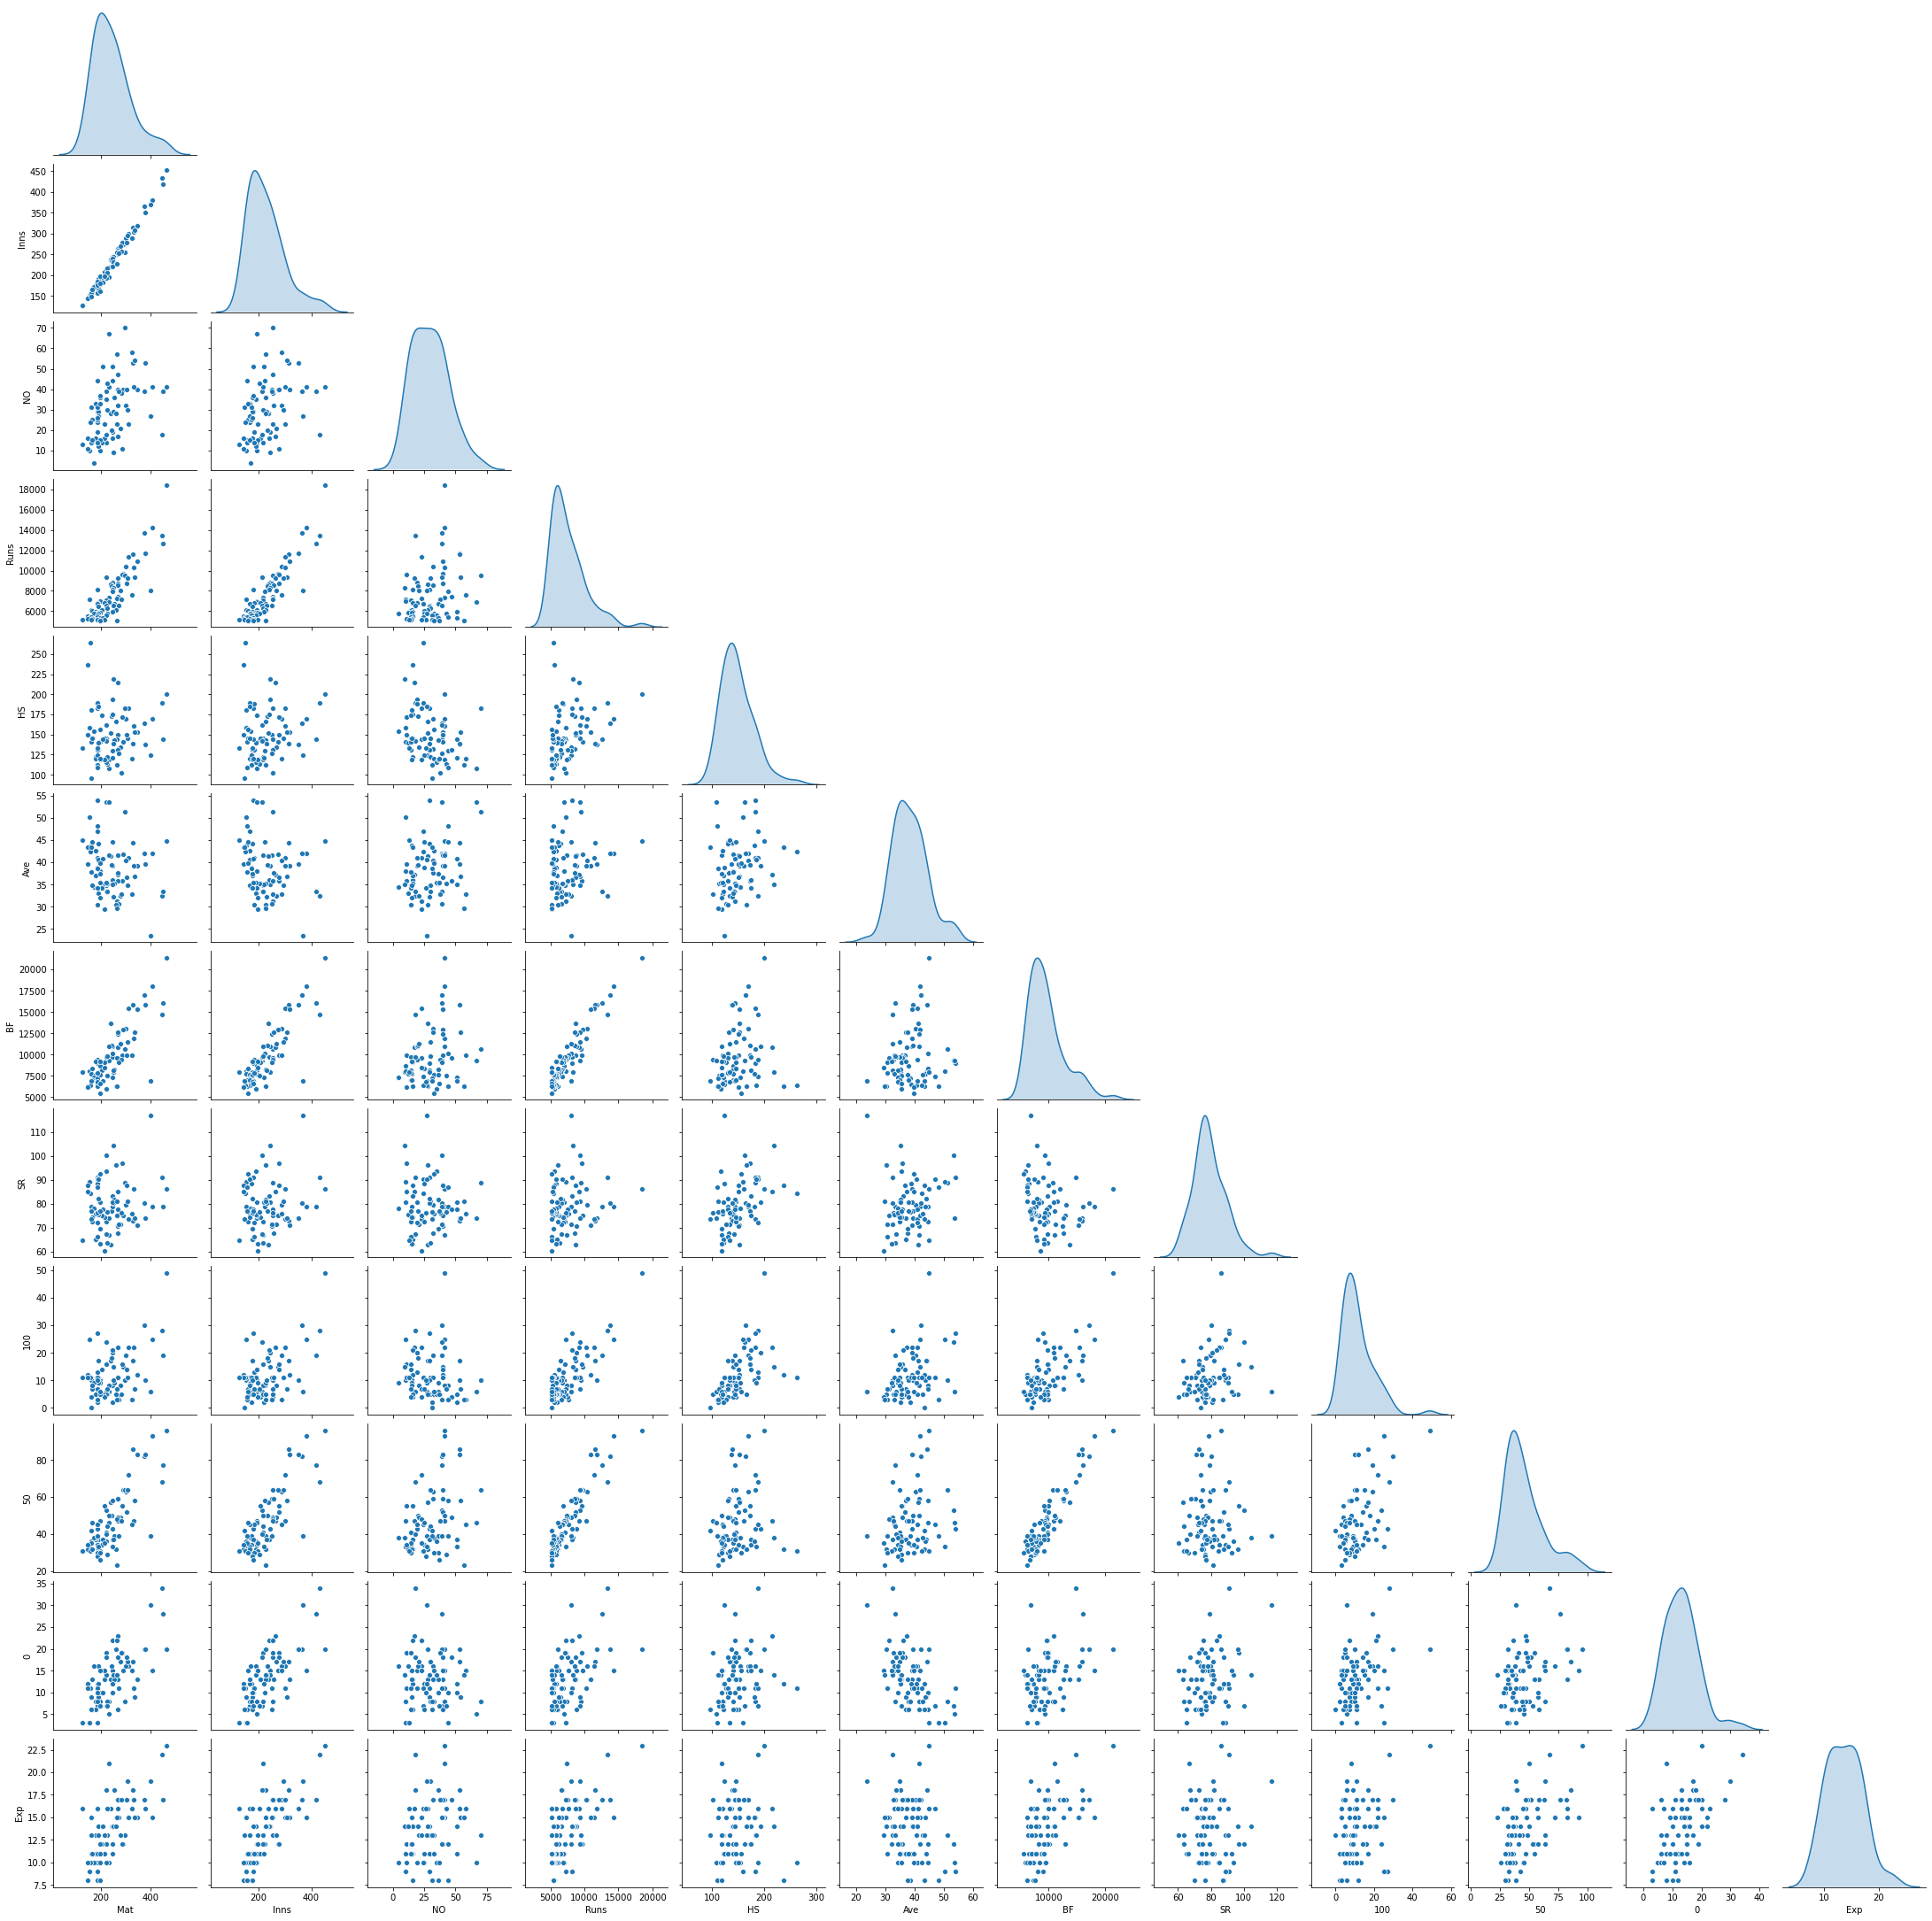

In [42]:
sns.pairplot(df,corner=True,diag_kind="kde")
plt.show()

Outlier Analysis

In [43]:
df.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,149.253165,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165,13.746835
std,74.211716,70.321022,14.421710,2551.873313,31.285070,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755,3.310699
min,128.000000,127.000000,4.000000,5080.000000,96.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000,8.000000
25%,188.000000,177.000000,17.500000,5759.000000,125.500000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000,11.000000
50%,232.000000,217.000000,29.000000,6798.000000,144.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000,14.000000
75%,281.500000,261.500000,40.000000,8739.500000,167.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,264.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000,23.000000


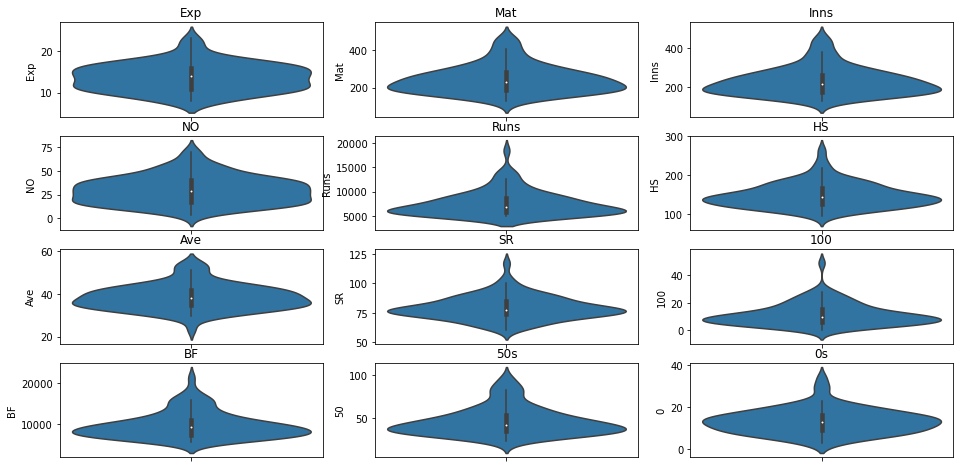

In [44]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

Plot histogram for each continous variables

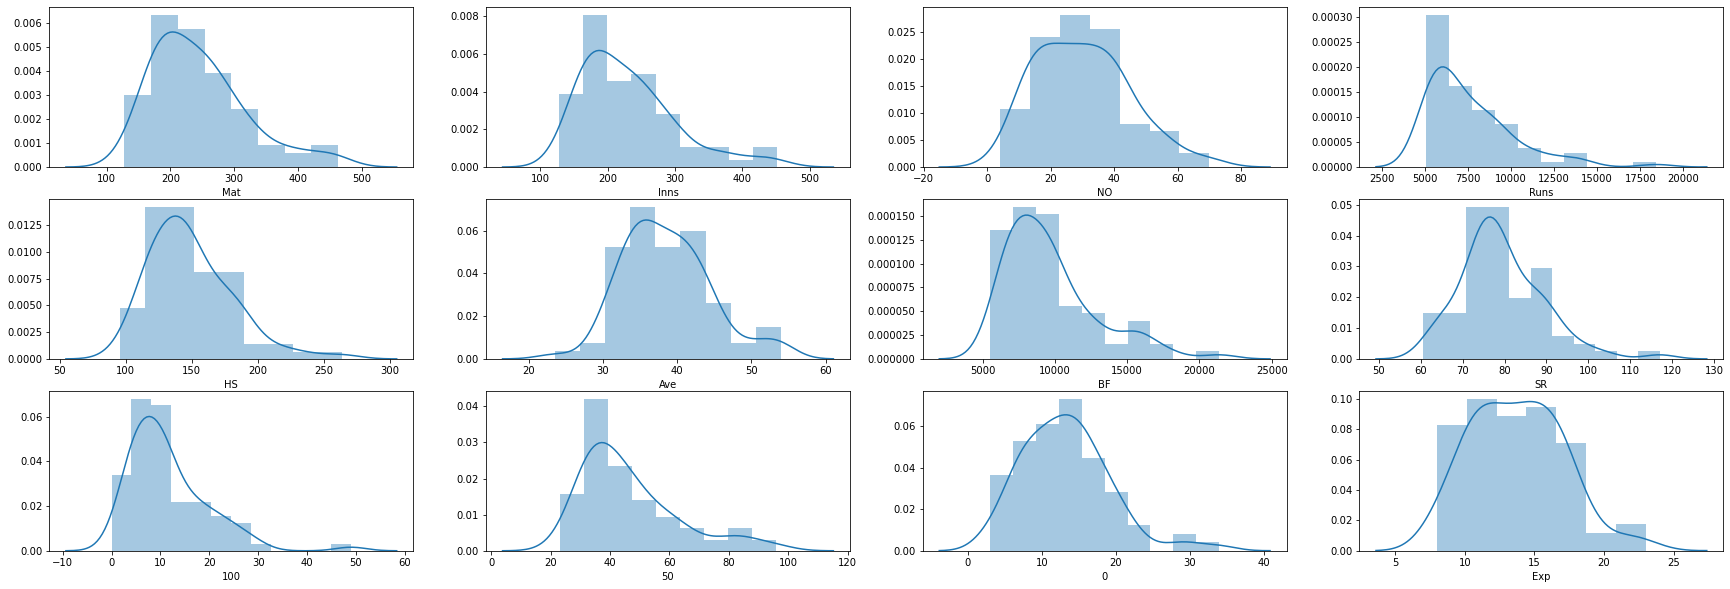

In [45]:
plt.figure(figsize = (30,10))
features=[ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'Exp']
for i in enumerate(features):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]])

Percentile Capping (Winsorization) for outliers handling

In [46]:
Q3 = df.Mat.quantile(0.99)
Q1 = df.Mat.quantile(0.01)
df['Mat'][df['Mat']<=Q1]=Q1
df['Mat'][df['Mat']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
Q3 = df.Inns.quantile(0.99)
Q1 = df.Inns.quantile(0.01)
df['Inns'][df['Inns']<=Q1]=Q1
df['Inns'][df['Inns']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
Q3 = df.NO.quantile(0.99)
Q1 = df.NO.quantile(0.01)
df['NO'][df['NO']<=Q1]=Q1
df['NO'][df['NO']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
Q3 = df.Runs.quantile(0.99)
Q1 = df.Runs.quantile(0.01)
df['Runs'][df['Runs']<=Q1]=Q1
df['Runs'][df['Runs']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
Q3 = df.HS.quantile(0.99)
Q1 = df.HS.quantile(0.01)
df['HS'][df['HS']<=Q1]=Q1
df['HS'][df['HS']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
Q3 = df.Ave.quantile(0.99)
Q1 = df.Ave.quantile(0.01)
df['Ave'][df['Ave']<=Q1]=Q1
df['Ave'][df['Ave']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
Q3 = df.BF.quantile(0.99)
Q1 = df.BF.quantile(0.01)
df['BF'][df['BF']<=Q1]=Q1
df['BF'][df['BF']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
Q3 = df.SR.quantile(0.99)
Q1 = df.SR.quantile(0.01)
df['SR'][df['SR']<=Q1]=Q1
df['SR'][df['SR']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [54]:
Q3 = df.Exp.quantile(0.99)
Q1 = df.Exp.quantile(0.01)
df['Exp'][df['Exp']<=Q1]=Q1
df['Exp'][df['Exp']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
Q3 = df['100'].quantile(0.99)
Q1 = df['100'].quantile(0.01)
df['100'][df['100']<=Q1]=Q1
df['100'][df['100']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
Q3 = df['50'].quantile(0.99)
Q1 = df['50'].quantile(0.01)
df['50'][df['50']<=Q1]=Q1
df['50'][df['50']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
Q3 = df['0'].quantile(0.99)
Q1 = df['0'].quantile(0.01)
df['0'][df['0']<=Q1]=Q1
df['0'][df['0']>=Q3]=Q3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


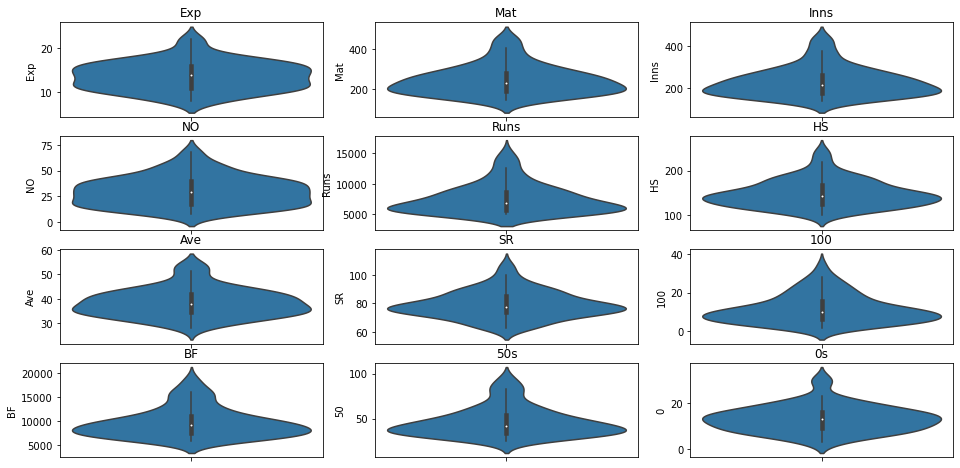

In [58]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [59]:
# Dropping Player field as final dataframe will only contain data columns

df_drop = df.copy()
player = df_drop.pop('Player')

In [60]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00


# Hopkins Statistics Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

• If the value is between {0.01, ...,0.3}, the data is regularly spaced.

• If the value is around 0.5, it is random.

• If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [61]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [62]:
# Hopkins score
Hopkins_score=round(hopkins(df_drop),2)

In [63]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))

0.82 is a good Hopkins score for Clustering.


# Rescaling the Features

In [64]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled 

array([[ 2.82279967e+00,  2.99188395e+00,  7.72431175e-01,
         3.18356123e+00,  1.69403032e+00,  1.08826122e+00,
         2.98241352e+00,  7.49179671e-01,  3.13264038e+00,
         2.92935542e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17526315e+00,  2.16409181e+00,  7.72431175e-01,
         2.79619505e+00,  6.63399607e-01,  5.92157985e-01,
         2.74368859e+00, -3.56865202e-02,  1.87083605e+00,
         2.88840881e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77825344e+00,  1.94693753e+00,  6.31248299e-01,
         2.57358047e+00,  4.97168847e-01,  6.00861551e-01,
         2.41609488e+00,  1.27250423e-01,  2.55809331e+00,
         2.20596529e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73655274e+00,  2.93137029e+00, -8.51171904e-01,
         2.45849293e+00,  1.32832265e+00, -1.08240802e+00,
         1.65726753e+00,  1.27845850e+00,  2.28319041e+00,
         1.33740082e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77762271e+00,  2.71421601e+00,  6.3124829

In [65]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


# Model Building

# K- means Clustering

## Finding the Optimal Number of Clusters

### Elbow Curve to get the right number of Clusters

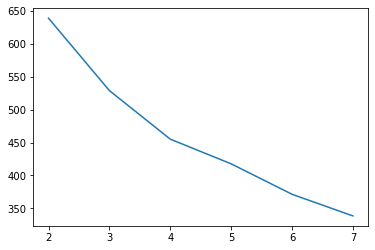

In [66]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

Looking at the above elbow curve it looks good to proceed with 4 clusters.

### Silhouette Analysis

silhouette score=(p−q)/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [67]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3054991264528683
For n_clusters=3, the silhouette score is 0.2163403200855808
For n_clusters=4, the silhouette score is 0.206546877361701
For n_clusters=5, the silhouette score is 0.18684813364110467
For n_clusters=6, the silhouette score is 0.18745192354283535
For n_clusters=7, the silhouette score is 0.18832973777499537
For n_clusters=8, the silhouette score is 0.19398413840649628


> We will opt for 4 as cluster = 2 is not making sense in decison making.

In [68]:
#K-means with k=4 clusters

cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_df1)

KMeans(max_iter=150, n_clusters=4, random_state=15)

In [69]:
# Cluster labels

cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 1, 1, 3, 1, 2, 3, 2,
       2, 2, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [70]:
# Assign the label

df['Cluster_Id'] = cluster.labels_
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
0,SR Tendulkar (INDIA),451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22,0
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00,0
2,RT Ponting (AUS/ICC),375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00,0
3,ST Jayasuriya (Asia/SL),445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00,0
4,DPMD Jayawardene (Asia/SL),448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,0


In [71]:
## Number of countries in each cluster
df.Cluster_Id.value_counts(ascending=True)

0    10
3    17
2    23
1    29
Name: Cluster_Id, dtype: int64

It seems there are good number of countries in each clusters.

From the business understanding we have learnt that Ave, NO, SR are some important factors which decides the form of a player. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

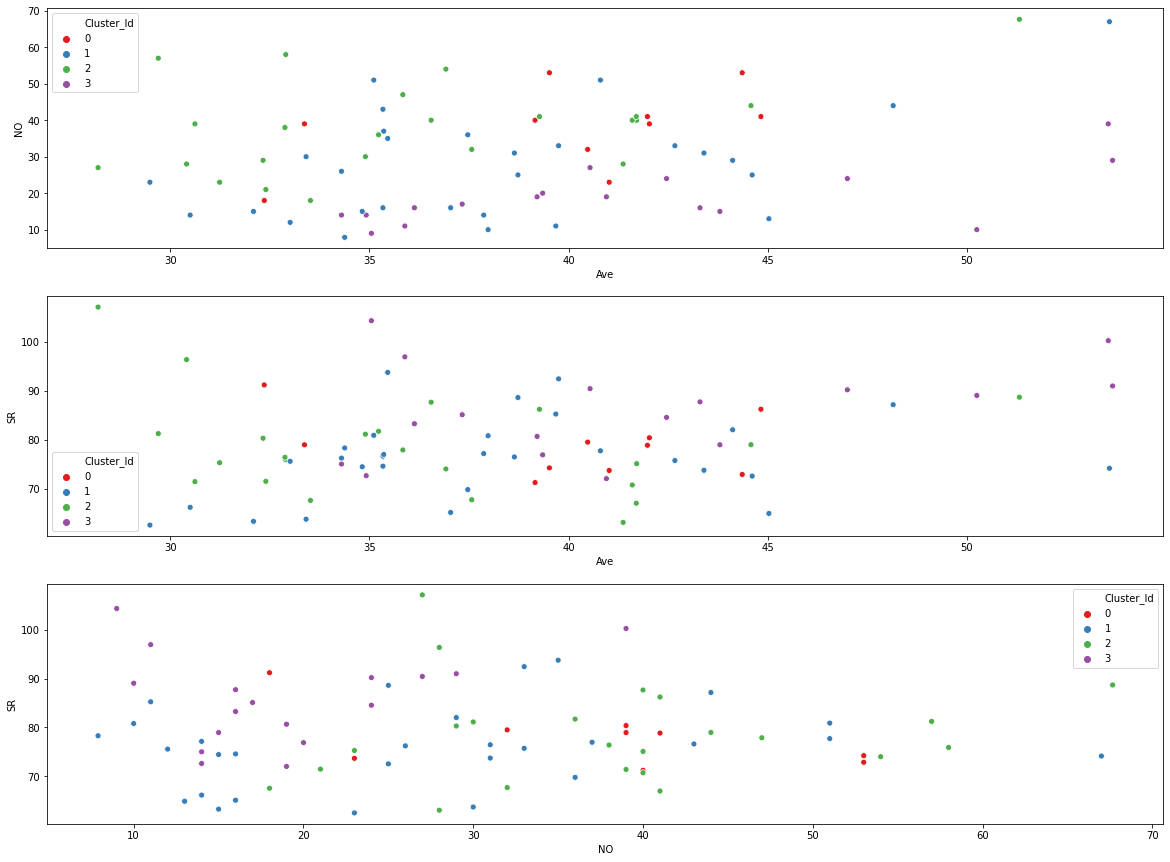

In [72]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Ave', y = 'NO',hue='Cluster_Id',data = df,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Ave', y = 'SR',hue='Cluster_Id', data = df,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'NO', y = 'SR',hue='Cluster_Id', data=df,legend='full',palette="Set1")
plt.show()


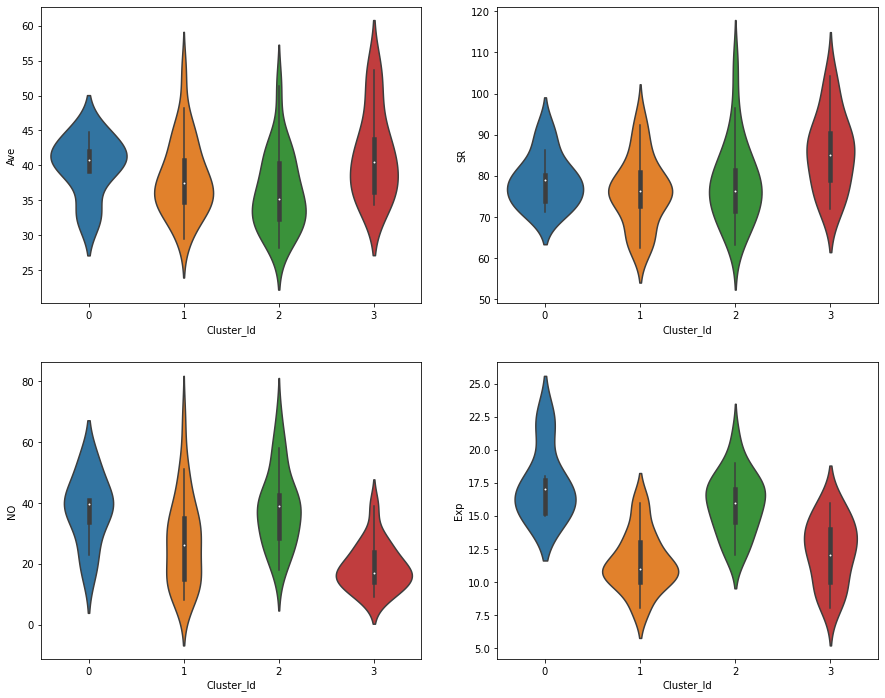

In [73]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'Ave', data = df,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'SR', data = df,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'NO', data=df,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'Exp', data=df,ax=axes[1][1])
plt.show()

In [74]:
df[['NO','Ave','SR','Cluster_Id']].groupby('Cluster_Id').mean()

,NO,Ave,SR
Cluster_Id,,,
0,37.900000,39.911000,78.722000
1,27.375862,38.211379,76.101917
2,38.202609,36.206417,78.397278
3,19.000000,41.628776,85.829412


## Cluster Profiling

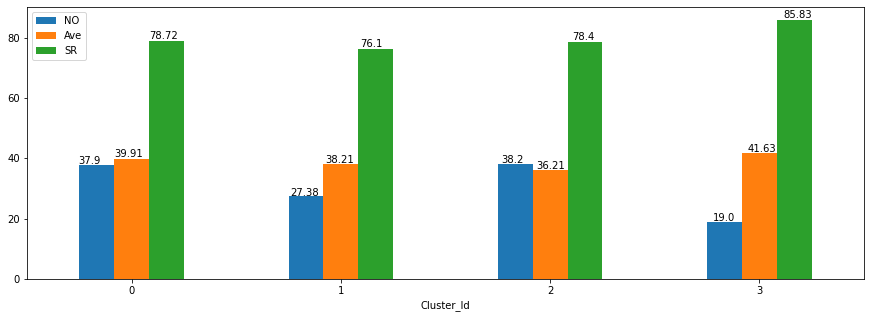

In [75]:
ax=df[['NO','Ave','SR','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=0)
plt.show();

In [76]:
df[df['Cluster_Id']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Can be Batsman Coach

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
3,ST Jayasuriya (Asia/SL),445.0,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,30.88,22.0,0
7,SC Ganguly (Asia/INDIA),311.0,300.0,23.0,11363.0,183.0,41.02,15416.0,73.70,22.0,72.0,16.00,15.0,0
9,BC Lara (ICC/WI),299.0,289.0,32.0,10405.0,169.0,40.48,13086.0,79.51,19.0,63.0,16.00,17.0,0
2,RT Ponting (AUS/ICC),375.0,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.00,17.0,0
4,DPMD Jayawardene (Asia/SL),448.0,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.00,17.0,0


In [77]:
df[df['Cluster_Id']==1].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Openers

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
60,Tamim Iqbal (BDESH),173.00,171.00,7.9,5743.0,154.0,34.38,7333.0,78.31,9.0,38.0,16.0,10.0,1
37,GC Smith (Afr/SA),197.00,194.00,10.0,6989.0,141.0,37.98,8648.0,80.81,10.0,47.0,8.0,11.0,1
70,G Gambhir (INDIA),147.00,143.00,11.0,5238.0,150.0,39.68,6144.0,85.25,11.0,34.0,11.0,10.0,1
54,Mohammad Hafeez (PAK),190.00,190.00,12.0,5876.0,140.0,33.01,7774.0,75.58,11.0,32.0,16.0,14.0,1
74,CG Greenidge (WI),142.04,139.48,13.0,5134.0,133.0,45.03,7908.0,64.92,11.0,31.0,3.0,16.0,1


In [78]:
df[df['Cluster_Id']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Chockers 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
43,GW Flower (ZIM),221.0,214.0,18.0,6571.0,142.0,33.5200,9723.0,67.5800,6.0,40.0,18.0,18.0,2
28,SP Fleming (ICC/NZ),280.0,269.0,21.0,8037.0,134.0,32.4000,11242.0,71.4900,8.0,49.0,17.0,13.0,2
33,Younis Khan (PAK),265.0,255.0,23.0,7249.0,144.0,31.2400,9628.0,75.2900,7.0,48.0,22.0,15.0,2
27,Shahid Afridi (Asia/ICC/PAK),398.0,369.0,27.0,8064.0,124.0,28.1876,6892.0,107.1174,6.0,39.0,30.0,19.0,2
21,DL Haynes (WI),238.0,237.0,28.0,8648.0,152.0,41.3700,13707.0,63.0900,17.0,57.0,13.0,16.0,2


In [79]:
df[df['Cluster_Id']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Hitters

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
24,V Sehwag (Asia/ICC/INDIA),251.0,245.0,9.0,8273.0,219.0,35.05,7929.0,104.33,15.0,38.0,14.0,14.0,3
34,HM Amla (SA),156.0,153.0,10.0,7186.0,159.0,50.25,8069.0,89.05,25.0,33.0,3.0,9.0,3
12,AC Gilchrist (AUS/ICC),287.0,279.0,11.0,9619.0,172.0,35.89,9922.0,96.94,16.0,55.0,19.0,12.0,3
36,NJ Astle (NZ),223.0,217.0,14.0,7090.0,145.0,34.92,9760.0,72.64,16.0,41.0,19.0,12.0,3
48,WU Tharanga (Asia/SL),204.0,193.0,14.0,6140.0,174.0,34.30,8183.0,75.03,14.0,34.0,15.0,12.0,3


# Final List of Players who can appointed in a new team for Batsman role 

In [80]:
FinalListbyKMean=df[df['Cluster_Id']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
FinalListbyKMean['Player']
FinalListbyKMean.reset_index(drop=True).Player[:]

0     V Sehwag (Asia/ICC/INDIA)
1                  HM Amla (SA)
2        AC Gilchrist (AUS/ICC)
3                 NJ Astle (NZ)
4         WU Tharanga (Asia/SL)
5           ML Hayden (AUS/ICC)
6               MJ Guptill (NZ)
7                 HH Gibbs (SA)
8             CH Gayle (ICC/WI)
9                G Kirsten (SA)
10            Saeed Anwar (PAK)
11               ME Waugh (AUS)
12            IVA Richards (WI)
13            RG Sharma (INDIA)
14              SR Watson (AUS)
15              V Kohli (INDIA)
16      AB de Villiers (Afr/SA)
Name: Player, dtype: object

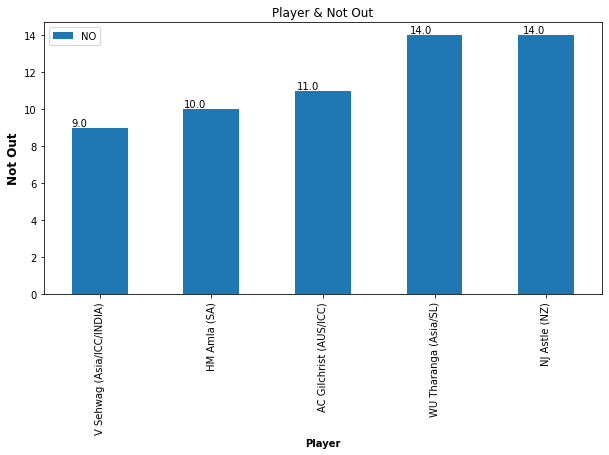

In [81]:
df_list_no = pd.DataFrame(FinalListbyKMean.groupby(['Player'])['NO'].mean().sort_values(ascending = True)).head()
ax=df_list_no.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Not Out')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Not Out", fontsize = 12, fontweight = 'bold')
plt.show()

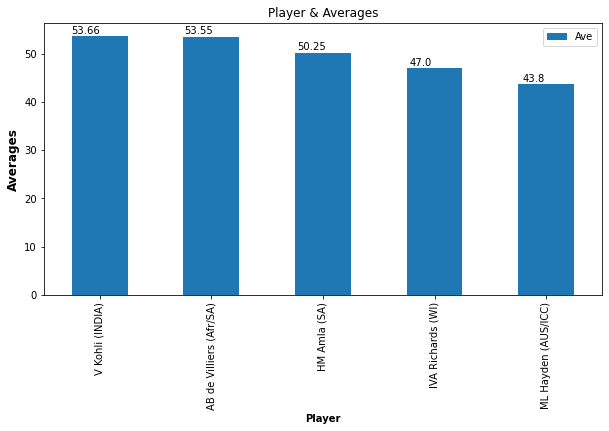

In [82]:
df_list_ave = pd.DataFrame(FinalListbyKMean.groupby(['Player'])['Ave'].mean().sort_values(ascending = False)).head()
ax=df_list_ave.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Averages')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Averages", fontsize = 12, fontweight = 'bold')
plt.show()

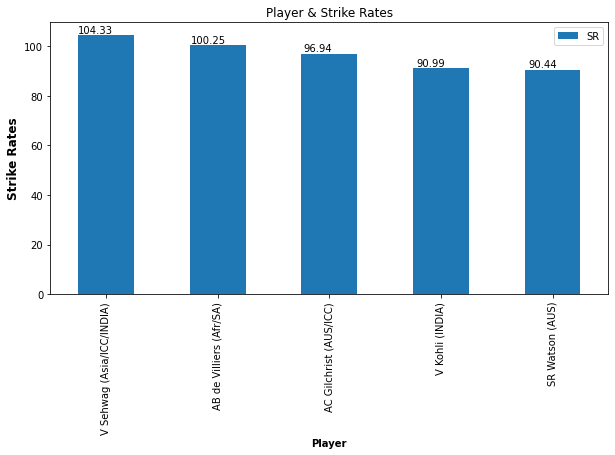

In [83]:
df_list_sr = pd.DataFrame(FinalListbyKMean.groupby(['Player'])['SR'].mean().sort_values(ascending = False)).head()
ax=df_list_sr.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Strike Rates')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Strike Rates", fontsize = 12, fontweight = 'bold')
plt.show()

# Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative.

In [84]:
df_df1.head()


,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

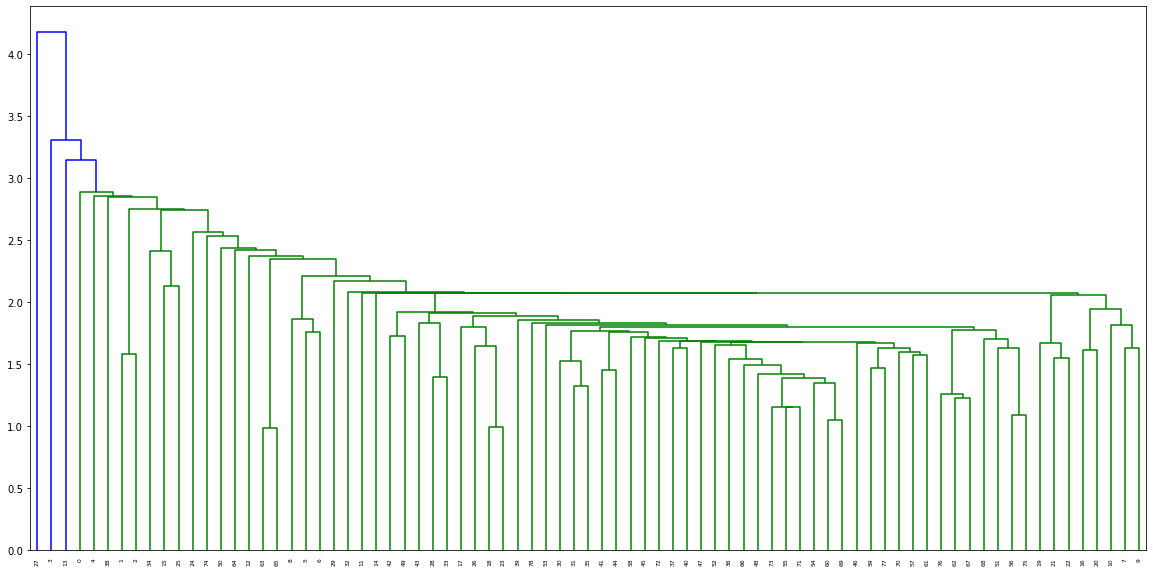

In [85]:
# Single linkage
plt.figure(figsize = (20,10))
mergings = linkage(df_df1, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

# Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

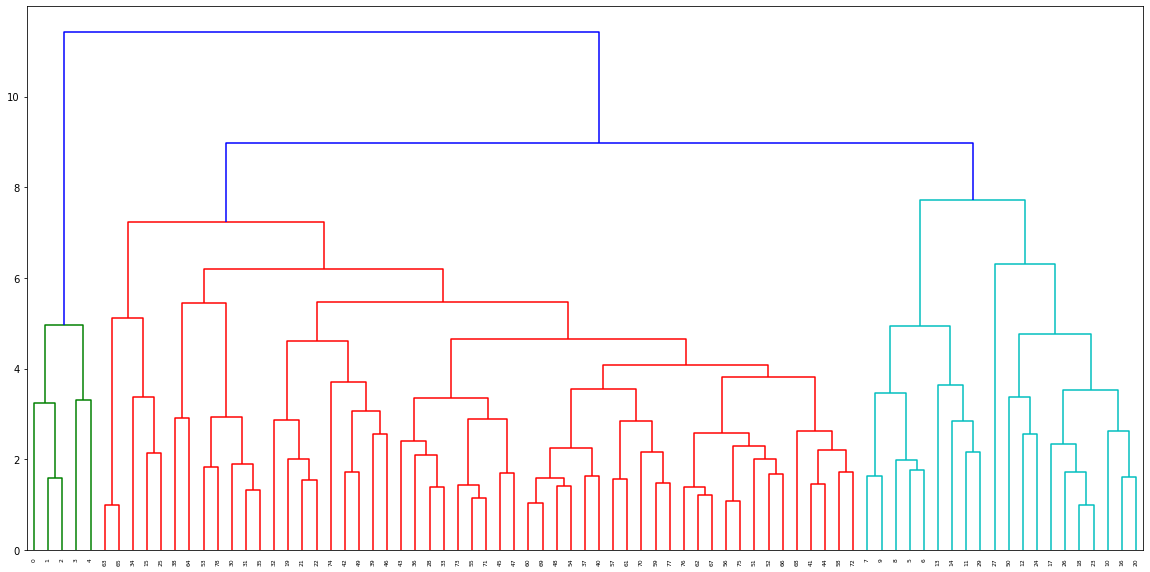

In [86]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(df_df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [87]:
df_hc = df.copy()
df_hc = df_hc.drop('Cluster_Id',axis=1)
df_hc.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,RT Ponting (AUS/ICC),375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,ST Jayasuriya (Asia/SL),445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,DPMD Jayawardene (Asia/SL),448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00


Complete Linkage suggests for 4 clusters ,

In [88]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [89]:
# assign cluster labels
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
0,SR Tendulkar (INDIA),451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22,0
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00,0
2,RT Ponting (AUS/ICC),375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00,0
3,ST Jayasuriya (Asia/SL),445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00,0
4,DPMD Jayawardene (Asia/SL),448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,0


In [90]:
## Number of countries in each cluster
df_hc.Cluster_labels.value_counts(ascending=True)

0     5
1     9
2    11
3    54
Name: Cluster_labels, dtype: int64

It seems there are good number of countries in each clusters.

From the business understanding we have learnt that Ave, NO, SR are some important factors which decides the form of a player. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

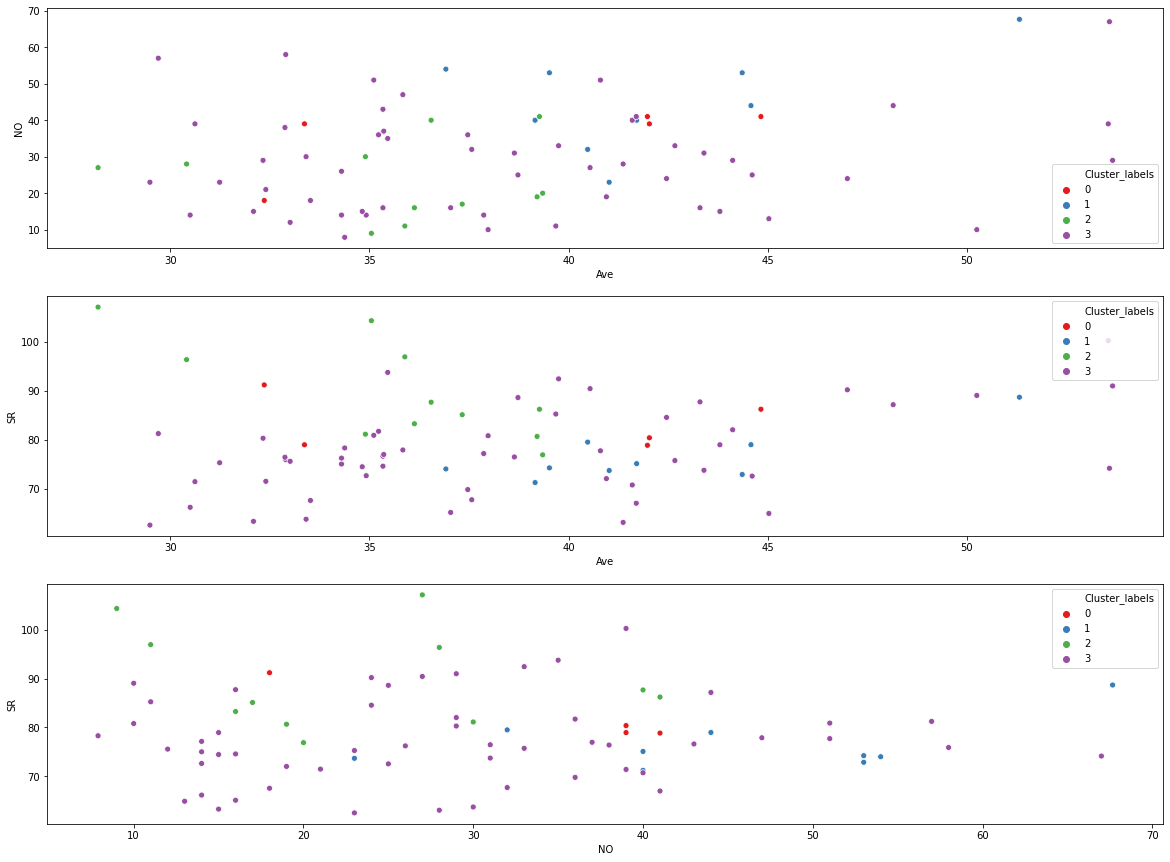

In [91]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Ave', y = 'NO',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Ave', y = 'SR',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'NO', y = 'SR',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.show()


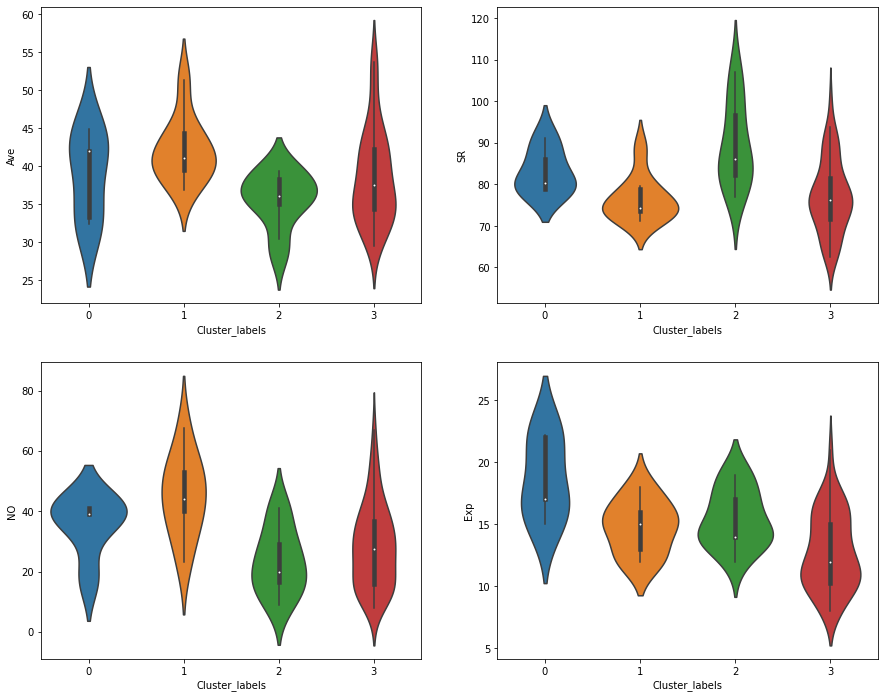

In [92]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_labels', y = 'Ave', data = df_hc,ax=axes[0][0])
sns.violinplot(x = 'Cluster_labels', y = 'SR', data = df_hc,ax=axes[0][1])
sns.violinplot(x = 'Cluster_labels', y = 'NO', data=df_hc,ax=axes[1][0])
sns.violinplot(x = 'Cluster_labels', y = 'Exp', data=df_hc,ax=axes[1][1])
plt.show()

In [93]:
df_hc[['NO','Ave','SR','Cluster_labels']].groupby('Cluster_labels').mean()

,NO,Ave,SR
Cluster_labels,,,
0,35.600000,38.914000,83.128000
1,45.184444,42.118889,76.485556
2,23.454545,35.661600,89.611582
3,28.368519,38.551096,77.160659


# Cluster Profiling

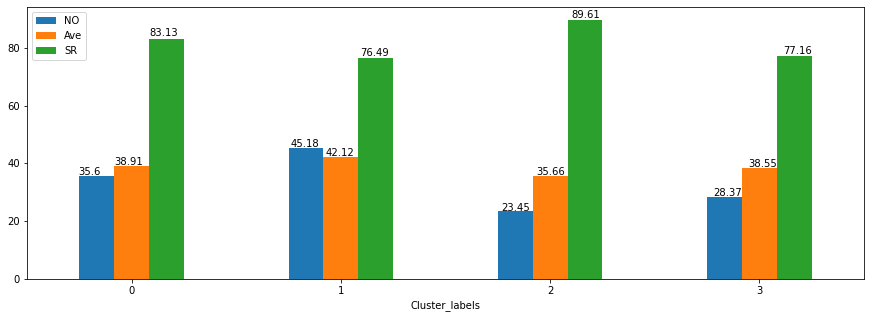

In [94]:
ax=df_hc[['NO','Ave','SR','Cluster_labels']].groupby('Cluster_labels').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=0)
plt.show();

In [95]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Can be Batsman Coach

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
3,ST Jayasuriya (Asia/SL),445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00,0
2,RT Ponting (AUS/ICC),375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00,0
4,DPMD Jayawardene (Asia/SL),448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,0
0,SR Tendulkar (INDIA),451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22,0
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00,0


In [96]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#MiddleOrders 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
7,SC Ganguly (Asia/INDIA),311.0,300.0,23.0,11363.0,183.0,41.02,15416.0,73.70,22.0,72.0,16.0,15.0,1
9,BC Lara (ICC/WI),299.0,289.0,32.0,10405.0,169.0,40.48,13086.0,79.51,19.0,63.0,16.0,17.0,1
11,Mohammad Yousuf (Asia/PAK),288.0,273.0,40.0,9720.0,141.0,41.71,12942.0,75.10,15.0,64.0,15.0,12.0,1
8,R Dravid (Asia/ICC/INDIA),344.0,318.0,40.0,10889.0,153.0,39.16,15284.0,71.24,12.0,83.0,13.0,15.0,1
29,MJ Clarke (AUS),245.0,223.0,44.0,7981.0,130.0,44.58,10104.0,78.98,8.0,58.0,10.0,12.0,1


In [97]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Hitters

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
24,V Sehwag (Asia/ICC/INDIA),251.0,245.0,9.0,8273.0,219.0,35.05,7929.0,104.33,15.0,38.0,14.0,14.0,2
12,AC Gilchrist (AUS/ICC),287.0,279.0,11.0,9619.0,172.0,35.89,9922.0,96.94,16.0,55.0,19.0,12.0,2
26,HH Gibbs (SA),248.0,240.0,16.0,8094.0,175.0,36.13,9721.0,83.26,21.0,37.0,22.0,14.0,2
17,CH Gayle (ICC/WI),269.0,264.0,17.0,9221.0,215.0,37.33,10834.0,85.11,22.0,47.0,23.0,16.0,2
18,Saeed Anwar (PAK),247.0,244.0,19.0,8824.0,194.0,39.21,10938.0,80.67,20.0,43.0,15.0,14.0,2


In [98]:
df_hc[df_hc['Cluster_labels']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Hitters 2 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
60,Tamim Iqbal (BDESH),173.0,171.0,7.9,5743.0,154.0,34.38,7333.0,78.31,9.0,38.0,16.0,10.0,3
34,HM Amla (SA),156.0,153.0,10.0,7186.0,159.0,50.25,8069.0,89.05,25.0,33.0,3.0,9.0,3
37,GC Smith (Afr/SA),197.0,194.0,10.0,6989.0,141.0,37.98,8648.0,80.81,10.0,47.0,8.0,11.0,3
70,G Gambhir (INDIA),147.0,143.0,11.0,5238.0,150.0,39.68,6144.0,85.25,11.0,34.0,11.0,10.0,3
54,Mohammad Hafeez (PAK),190.0,190.0,12.0,5876.0,140.0,33.01,7774.0,75.58,11.0,32.0,16.0,14.0,3


# Final List of Players who can appointed in a new team for Batsman role

In [99]:
FinalListbyHC=df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
FinalListbyHC['Player']
FinalListbyHC.reset_index(drop=True).Player[:]

0        V Sehwag (Asia/ICC/INDIA)
1           AC Gilchrist (AUS/ICC)
2                    HH Gibbs (SA)
3                CH Gayle (ICC/WI)
4                Saeed Anwar (PAK)
5                   ME Waugh (AUS)
6     Shahid Afridi (Asia/ICC/PAK)
7                 BB McCullum (NZ)
8                 PA de Silva (SL)
9        Yuvraj Singh (Asia/INDIA)
10                 TM Dilshan (SL)
Name: Player, dtype: object

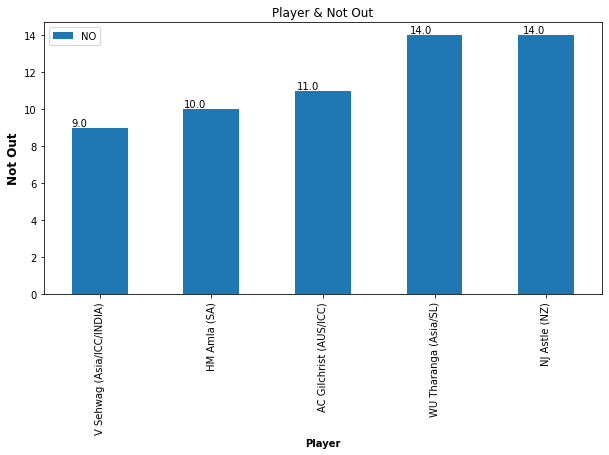

In [100]:
df_list_hc = pd.DataFrame(FinalListbyHC.groupby(['Player'])['NO'].mean().sort_values(ascending = True)).head()
ax=df_list_no.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Not Out')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Not Out", fontsize = 12, fontweight = 'bold')
plt.show()

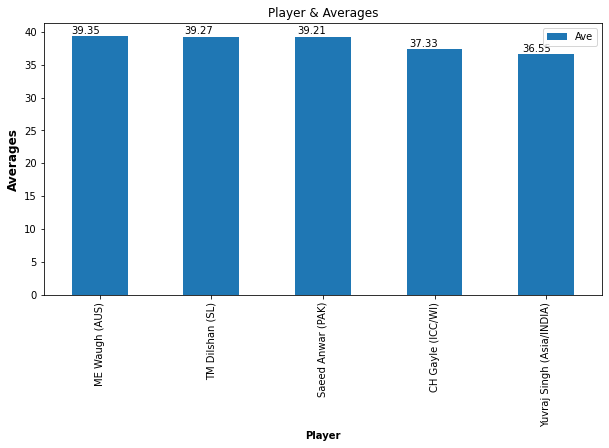

In [101]:
df_list_ave = pd.DataFrame(FinalListbyHC.groupby(['Player'])['Ave'].mean().sort_values(ascending = False)).head()
ax=df_list_ave.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Averages')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Averages", fontsize = 12, fontweight = 'bold')
plt.show()

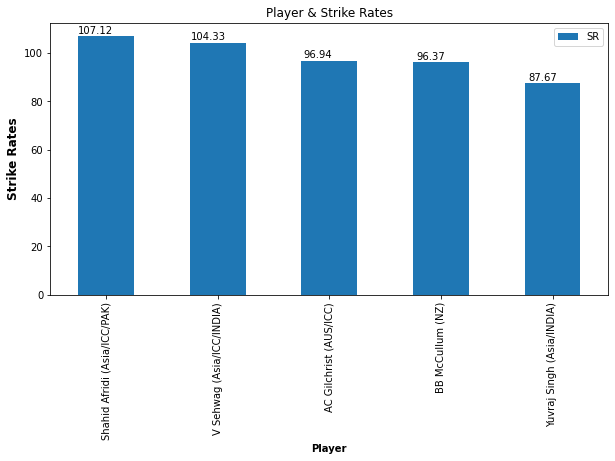

In [102]:
df_list_sr = pd.DataFrame(FinalListbyHC.groupby(['Player'])['SR'].mean().sort_values(ascending = False)).head()
ax=df_list_sr.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Strike Rates')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Strike Rates", fontsize = 12, fontweight = 'bold')
plt.show()

- We have analyzed both K-means and Hierarchial clustering and found clusters formed are identical.
- The time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2)
- Difference in execution was not experienced as dataset was very small.
- K Means clustering requires prior knowledge of K i.e. no. of clusters we want to divide our data into. But, we can stop at whatever number of clusters we find appropriate in hierarchical clustering by interpreting the dendrogram
- So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of players for the team

# Final Analysis

In [103]:
## Number of countries in each cluster in K-Means 
df.Cluster_Id.value_counts(ascending=True)

0    10
3    17
2    23
1    29
Name: Cluster_Id, dtype: int64

In [104]:
## Number of countries in each cluster for Hierarchical clustering
df_hc.Cluster_labels.value_counts(ascending=True)

0     5
1     9
2    11
3    54
Name: Cluster_labels, dtype: int64

Though Required Clusters have same players , but for Hierarchical clustering has more execution time compared to K-Mean

K-mean is an ideal algorithm for this problem statement.

# Final List of Players who can appointed in a new team for Batsman role

In [105]:
FinalListbyKMean=df[df['Cluster_Id']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
FinalListbyKMean['Player']
FinalListbyKMean.reset_index(drop=True).Player[:5]

0    V Sehwag (Asia/ICC/INDIA)
1                 HM Amla (SA)
2       AC Gilchrist (AUS/ICC)
3                NJ Astle (NZ)
4        WU Tharanga (Asia/SL)
Name: Player, dtype: object

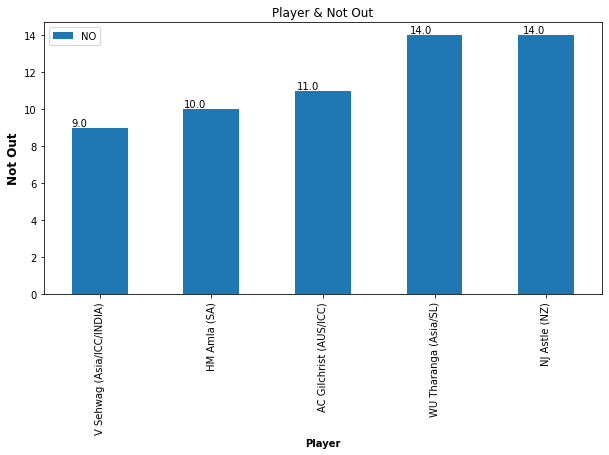

In [106]:
df_list_no = pd.DataFrame(FinalListbyKMean.groupby(['Player'])['NO'].mean().sort_values(ascending = True)).head()
ax=df_list_no.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Not Out')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Not Out", fontsize = 12, fontweight = 'bold')
plt.show()

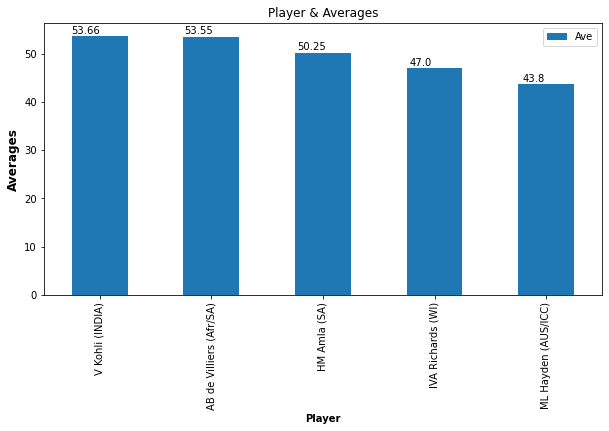

In [107]:
# plots
df_list_ave = pd.DataFrame(FinalListbyKMean.groupby(['Player'])['Ave'].mean().sort_values(ascending = False)).head()
ax=df_list_ave.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Averages')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Averages", fontsize = 12, fontweight = 'bold')
plt.show()

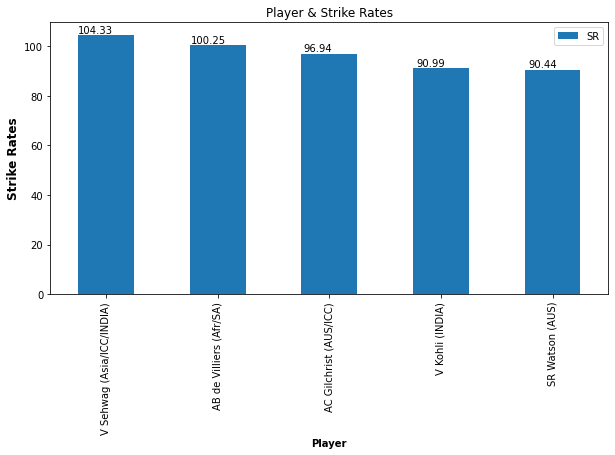

In [108]:
df_list_sr = pd.DataFrame(FinalListbyKMean.groupby(['Player'])['SR'].mean().sort_values(ascending = False)).head()
ax=df_list_sr.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Player & Strike Rates')
plt.xlabel("Player",fontweight = 'bold')
plt.ylabel("Strike Rates", fontsize = 12, fontweight = 'bold')
plt.show()

# Conclusion

We recommend to use K-means for clustering of players and then later we identified few factors like NO,SR & Ave etc which plays a vital role in deciding the final players and builded clusters of players based on that. Based on those clusters we have identified the below list of players for team. The list of players are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.



In [109]:
#FinalList with K-Means
FinalListbyKMean.reset_index(drop=True).Player[:5]

0    V Sehwag (Asia/ICC/INDIA)
1                 HM Amla (SA)
2       AC Gilchrist (AUS/ICC)
3                NJ Astle (NZ)
4        WU Tharanga (Asia/SL)
Name: Player, dtype: object

In [110]:
# Final Players list with Hierarchical clustering
FinalListbyHC.reset_index(drop=True).Player[:5]

0    V Sehwag (Asia/ICC/INDIA)
1       AC Gilchrist (AUS/ICC)
2                HH Gibbs (SA)
3            CH Gayle (ICC/WI)
4            Saeed Anwar (PAK)
Name: Player, dtype: object

In [111]:
# Final Players list
FinalListbyKMean.reset_index(drop=True).Player[:5]

0    V Sehwag (Asia/ICC/INDIA)
1                 HM Amla (SA)
2       AC Gilchrist (AUS/ICC)
3                NJ Astle (NZ)
4        WU Tharanga (Asia/SL)
Name: Player, dtype: object